

## Titanic Survivor Prediction Model
#### Kaggel Competition

Author: Cameron Presley

Version : 2021.10.22

email : cameron@ignitedzen.net

Dataset Filename : train.csv

### Background and Context



### Objective

1. Explore and visualize the dataset using EDA.

2. Prepare the data for model building:  Supervised and Unsupervised

3. Identify the best Supervised Model to make predictions and finalize the submission file

4. Explore Unsupervised Models and insignts

4. Provide insights based on EDA and model building


### Data Dictionary



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### Variable / Definition /	Key
* survived /	Survival / 0 = No, 1 = Yes
* pclass / Ticket class /	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	/ Sex	
* Age	/ Age in years	
* sibsp	 / (# of siblings / spouses aboard the Titanic)	
* parch /	(# of parents / children aboard the Titanic)
* ticket /	Ticket number	
* fare /	Passenger fare	
* cabin /	Cabin number	
* embarked /	Port of Embarkation /	C = Cherbourg, Q = Queenstown, S = Southampton

## Outline, Actions, and Key Deliverables


- <a href = #link1>1.  Exploratory Data Analysis </a>

    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis

- <a href = #link2>2.  Insights based on EDA </a>

- <a href = #link3>3.  Data Pre-processing </a>

    - Prepare the data for analysis 
    - Missing value Treatment, Outlier Detection/Treatment, Feature Engineering, Data Prep, Model Split


- <a href = #link4>4.  Model building & 5. Tuning </a>

- <a href = #link6>6.  Model performance evaluation </a>

- <a href = #link7>7.  Actionable Insights & Recommendations </a>








In [4]:

# In standard Markdown, place an anchor <a name="abcd"></a> 
#where you want to link to and refer to it on the same page by [link text](#abcd)


### import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot, etc., read in the dataset, set some styling

In [5]:
!pip3 install ppscore

     |████████████████████████████████| 47 kB 2.1 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=0b305fc6ef42337b0e10004fde4701f9940bb1135a386b74815e351663ed0450
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


In [6]:
#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

#import libraries for working arrays, dataframes, and performing linear alegebra operations
import numpy as np 
import pandas as pd 
import math

#library needed to read .xlsx files
import xlrd 

#data visualization librariers
import matplotlib.pyplot as plt
import seaborn as sns

#open up view of columns and increase view of row data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
#set a seed value to get the same results with each random sampling of the table
np.random.seed(99)

#statistical analysis libraries
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from statsmodels.stats.weightstats import ztest #statistical library for hypothesis testing
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test

#interactive plotting library

import plotly.graph_objs as go
import plotly.express as px
from itertools import cycle #use to cycle colors on plotly graphs

import pandas_profiling # library for automatic EDA

import ppscore as pps #importing ppscore to explore nonlinear correlations


#data cleansing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import missingno as mi

#model building libraries and tools

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

# --> CLASSIFIER MODELS

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# --> REGRESSOR MODELS

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier


# Removes the limit from the number of displayed columns and rows to increase df visibility
# uncap the cols, limit the rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)

#use seaborn styling
sns.set_style("whitegrid")


dataset_filename = '/content/drive/MyDrive/DATA_SCIENCE/Kaggel_Projects/Titanic/train.csv'
#dataset_filename ='/Users/cameronpresley/My Drive/DATA_SCIENCE/Kaggel_Projects/Titanic/train.csv'
#Load Dataset

data = pd.read_csv(dataset_filename)

# create copy of original data
df = data.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the training data set.')  # f-string


There are 891 rows and 12 columns in the training data set.


## Initial Data Review

In [7]:
df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S


### Observations on Data

* PassengerId appears to be a unique identifier and will most likely not add any value for model development.  Consider for dropping.
* Names are in the Surname, Title Given Name with exceptions in ( )
* Ages are listed with 2 significant digits passed the decimal. It appears that someone has already converted from whole years and fractional years, but we should explore to make sure that holds.  There appear to be obviously missing ages.
*Ticket numbers have disparate formats, pontential correlated to the passengers point of embarcation. 
* Cabin Numbers are obviously missing from some passengers.  


Will explore unique values for each variable and assess the degree of missing data.

In [8]:
# explore data type for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Need to convert objects to categories.  

* Other category candidates currently int64 dtypes are:  Pclass, SibSp, Parch

In [9]:
# look at basic statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Observations

* The training set is a list of 891 passengers
* There are 177 passengers with their ages missing.
* For those passengers we have age data for, the oldest passenger was 80. The youngest was 5 months old.
* The minimum fare was 0 pounds, supposedly for children under a certain age but not validated. The maximum fare ws 512.33 pounds.  50% of passengers paid between 7.91 and 31 pounds.
* Need to explore the Parch and Sibsp variables to understand better what they are reporting

In [10]:
#look at basic statistics for categorical variables

df.describe(include = ['object']).T

,count,unique,top,freq
Name,891,891,"Zimmerman, Mr. Leo",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


### Observations:

* There are 891 unique names.  Consider breaking these into Surnames for clustering analysis.
* There are 2 unique values for sex and no apparent missing data.
* Of the 891 tickets, only 681 are unique, suggesting duplicate ticket numbers or people traveling together on the same ticket number.
* Similar to ticket numbers, there are only 147 unique cabin numbers, again suggesting that passengers are sharing cabins as expected.  Need to explore missingness for Cabins to see if it will be useful for model building.

In [11]:
obj_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'
            ,'Survived','SibSp','Parch','Pclass']
df[obj_cols] = df[obj_cols].astype('category')
# step through each category value and list the unique values in each category

for i in obj_cols:
    print('*'*40)
    print('Unique values for',i, 'are :')
    print(df[i].value_counts())
    print('*'*40);

****************************************
Unique values for Name are :
van Melkebeke, Mr. Philemon                1
Goldschmidt, Mr. George B                  1
Graham, Miss. Margaret Edith               1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Goodwin, Mr. Charles Edward                1
                                          ..
Nilsson, Miss. Helmina Josefina            1
Nicola-Yarred, Miss. Jamila                1
Nicola-Yarred, Master. Elias               1
Nicholson, Mr. Arthur Ernest               1
Abbing, Mr. Anthony                        1
Name: Name, Length: 891, dtype: int64
****************************************
****************************************
Unique values for Sex are :
male      577
female    314
Name: Sex, dtype: int64
****************************************
****************************************
Unique values for Ticket are :
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240    

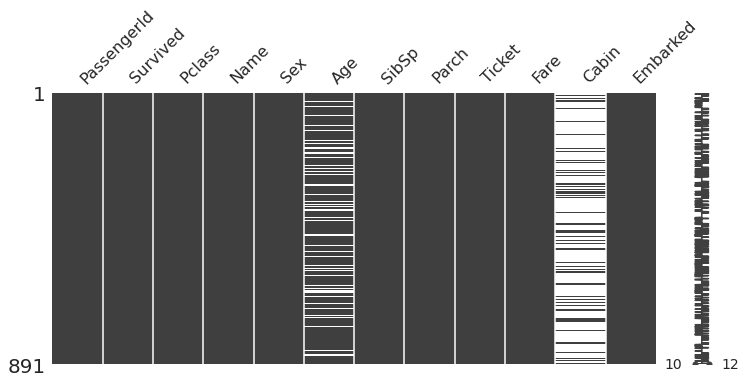

In [12]:
# Visualize the missing data spatially in the dataset
%matplotlib inline
mi.matrix (df, figsize = (12,5));

In [13]:
# checking for counts for obviously missing value counts

df.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### observations:

* 177 missing ages.  need to explore if these are probably children and with the same party (i.e., grouping by Surname, Cabin Number, Ticket Number, etc.)

* 687 missing cabin numbers.  again , try to understand if these are passengers who are sharing a cabin.  It's possible we can't tell for sure with any certainty.  This level of missing data as a percentage of the total sample size may make this feature unusable.

* There are 2 passengers missing embarcation information.

In [14]:
# check  for the unique values
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


### Observations

* PassengerId is a unique number and will not offer any value model building.

* Pclass, Sibsp, and Parch, Survived (will create a new variable changed to dtype category for EDA and visualization) should be treated as a category.  Will preserve the Survived dtype in the dataset for model building given it is naturally encoded.

* Age is right skewed.

### <a id = "link1"></a> 1.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE Deep Dive and Analysis

Variables treated as numbers and/or categories
* PassengerId (number only)
* Survived (number and category)
* Name (category)
* Sex (category)
* Ticket (number and category)
* Cabin (category)
* Embarked (category)
* Pclass (category)
* Age (number only)
* SibSp (category only) 
* Parch (category only)
* Fare (number only)


### Function for Numerical Variable Analysis

In [15]:
%matplotlib inline


In [16]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows -> subplot grid= 2
                                           sharex = True, # shared x-axis on both plots
                                           gridspec_kw = {"height_ratios": (.15, .85)}, 
                                           figsize = figsize 
                                           ) # build 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='tan') # boxplot will show the mean value
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,color = 'red') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='green') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to histogram to help with assessing skewness
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to histogram to help with assessing skewness

### Function for Categorical Variable Analysis

In [17]:

def bar_perc(plot, feature):
    
    total = len(feature) # count value for column
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # category percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # plot width
        y = p.get_y() + p.get_height()           # plot height
        ax.annotate(percentage, (x, y), size = 15) # label percentage value
    plt.show() # visualize plot
    


### Numerical variables review

#### PassengerId

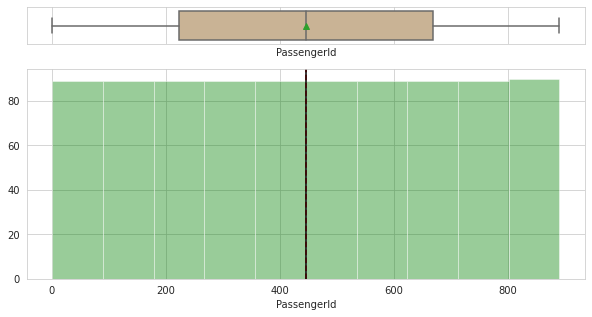

In [18]:
histogram_boxplot(df["PassengerId"])

In [19]:
miss_vals = df["PassengerId"].isnull().sum()
print ('*'*100)
print ('There are', df["PassengerId"].nunique(), 'unigue values:')
print (df["PassengerId"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['PassengerId'].describe().T

****************************************************************************************************
There are 891 unigue values:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 21

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

## Age

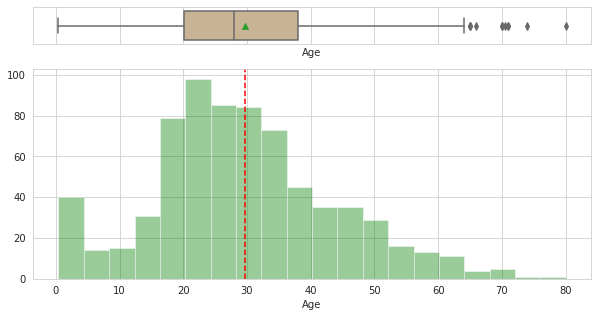

In [20]:
histogram_boxplot(df["Age"])

In [21]:
miss_vals = df["Age"].isnull().sum()
print ('*'*100)
print ('There are', df["Age"].nunique(), 'unique values:')
print (df["Age"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df["Age"].describe().T

****************************************************************************************************
There are 88 unique values:
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

obvious missing values to be treated 177
****************************************************************************************************


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

####Observations:

* The average age of a passenger was 29-30 years.
* 50% of the passengers were between 20 and 38 years.
* The oldest passenger was 80 years and the youngest was about about 5 months old.  
* We have ages for 714 of the 891 passengers and will need a good approach for dealing with missing values.  Will address in data-preprocessing / model- building.

## Fare

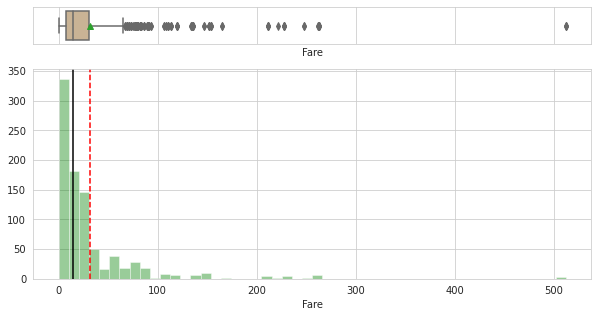

In [22]:
histogram_boxplot(df["Fare"])

In [23]:
miss_vals = df["Fare"].isnull().sum()
print ('*'*100)
print ('There are', df["Fare"].nunique(), 'unique values:')
print (df["Fare"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df["Fare"].describe().T

****************************************************************************************************
There are 248 unique values:
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525  

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Observations:

* There are 248 unique Fares and all 891 passengers have their Fare listed in the data set.

* The lowest fare was 0 pounds.  The highest fare was 512 pounds, and the mean was 32 pounds.  The 512 pounds is interesting as it must have been for a large group together, and the corresponding passengers with 0 fare are potentially part of groups.  Will explore in Groupby.

## Survived_Num (numerical treatment - predictor variable)

In [24]:
# Creating a numerical version of Survived to be used for model building later
df['Survived_Num'] = df['Survived'].astype('int64')

In [25]:
miss_vals = df["Survived_Num"].isnull().sum()
print ('*'*100)
print ('There are', df["Survived_Num"].nunique(), 'unique values:')
print (df["Survived_Num"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df["Survived_Num"].describe().T

****************************************************************************************************
There are 2 unique values:
[0 1]

obvious missing values to be treated 0
****************************************************************************************************


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived_Num, dtype: float64

## Categorial Variables Review

## Survived

* Treating Survived as a category for EDA only.

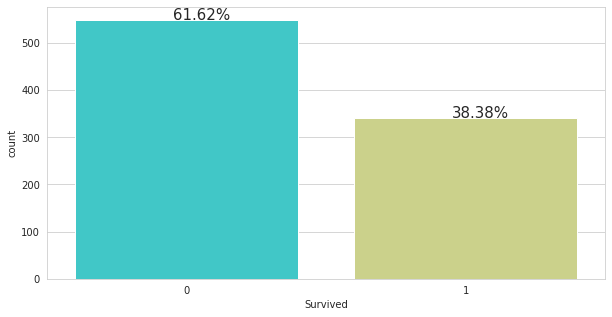

In [26]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Survived'], palette = 'rainbow')
bar_perc (ax,df['Survived'])

In [27]:
col_count = len(df['Survived'])
perc_col_unique = ((df['Survived'].value_counts())/col_count)*100
miss_vals = df['Survived'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Survived'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
0    549
1    342
Name: Survived, dtype: int64


Percentage category split (%):
0    61.616162
1    38.383838
Name: Survived, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


#### Observations

* 61.6% of the passengers perished (or, 38.4% of the passengers list survived)* The survival information for all 891 passengers is shown here.

## Pclass

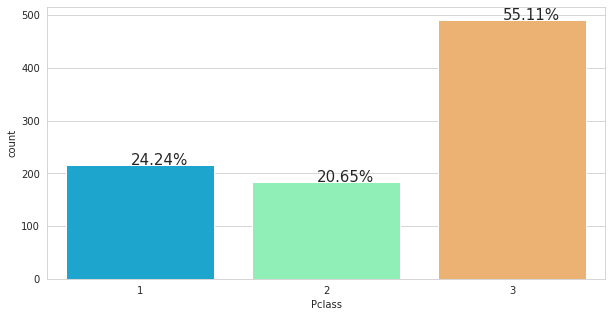

In [28]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Pclass'], palette = 'rainbow')
bar_perc (ax,df['Pclass'])

In [29]:
col_count = len(df['Pclass'])
perc_col_unique = ((df['Pclass'].value_counts())/col_count)*100
miss_vals = df['Pclass'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Pclass'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
3    491
1    216
2    184
Name: Pclass, dtype: int64


Percentage category split (%):
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


#### Observation

* The majority of passengers traveled in 3rd class.  With roughly 45% traveling in 1st and 2nd class combine (24% to 21%, respectively).



## Sex

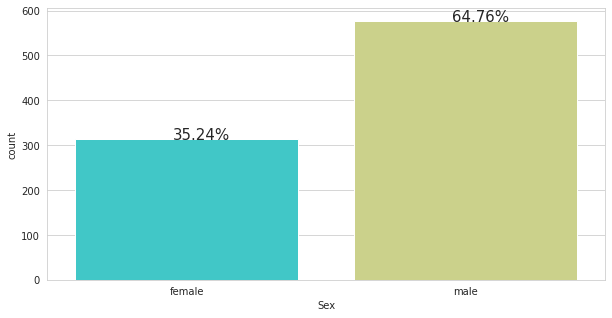

In [30]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Sex'], palette = 'rainbow')
bar_perc (ax,df['Sex'])

In [31]:
col_count = len(df['Sex'])
perc_col_unique = ((df['Sex'].value_counts())/col_count)*100
miss_vals = df['Sex'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Sex'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
male      577
female    314
Name: Sex, dtype: int64


Percentage category split (%):
male      64.758698
female    35.241302
Name: Sex, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


#### Observations

* There is about 1.8 to 1 ratio of Men to Women in the passenger list.  We need to explore the age groups of Men and Women (Male/Females) to understand which passengers could have really cared for themselves versus dependents such as infants and children who were certainly dependent on help for survival.  We should also try to understand the survival rate of men versus women, and then subdivide this by age groups as well to look for relationships/trends.



## SibSp

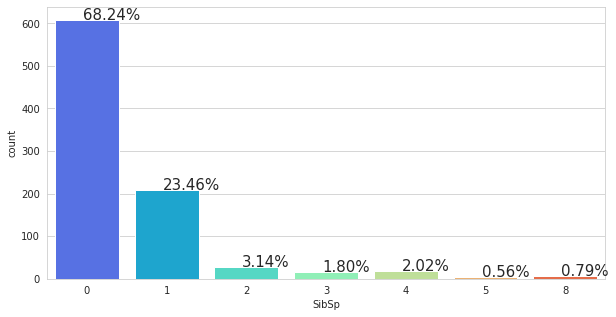

In [32]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['SibSp'], palette = 'rainbow')
bar_perc (ax,df['SibSp'])

In [33]:
col_count = len(df['SibSp'])
perc_col_unique = ((df['SibSp'].value_counts())/col_count)*100
miss_vals = df['SibSp'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['SibSp'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Percentage category split (%):
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


#### Observations

* 68% of the passengers were traveling without a Sibling or a Spouse.  They were either unmarried or were unaccompanied by another family member.

* 23% had 1 Sibling or a Spouse, i.e., they were accompanied by 1 person of this type.

* Should explore the age groups of these individuals to understand age groups for 91% of the passengers who fit in these 2 categories.

* A combined 8% were traveling with 2 or more accompanying (either a Sibling a Spouse, or both)




## Parch

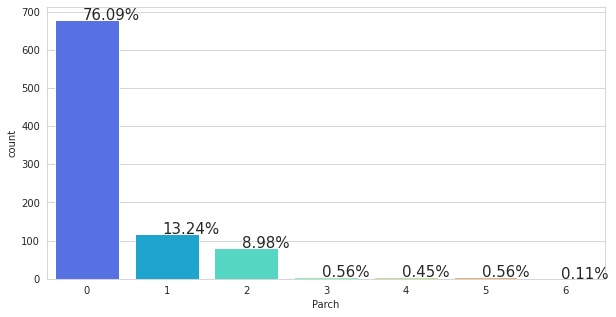

In [34]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Parch'], palette = 'rainbow')
bar_perc (ax,df['Parch'])

In [35]:
col_count = len(df['Parch'])
perc_col_unique = ((df['Parch'].value_counts())/col_count)*100
miss_vals = df['Parch'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Parch'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Percentage category split (%):
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


#### Observations

* 76% of the passengers were Parents without Children.
* 13% of the passengers were Parents with 1 Child.
* 9% of the passengers were Parents with 2 Children.
* 2% of the passengers had 3 or mor Children with a maximum of 6 children traveling in a family.

* Explore the age group, sex, and survial distributions for these groups.



## Create Family_Count Feature & Explore

In [36]:
df['Family_Count'] = df.apply(
    lambda row: row.SibSp + row.Parch + 1, axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Num,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [37]:
df['Family_Count'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [38]:
df['Family_Count']=df['Family_Count'].astype('category')

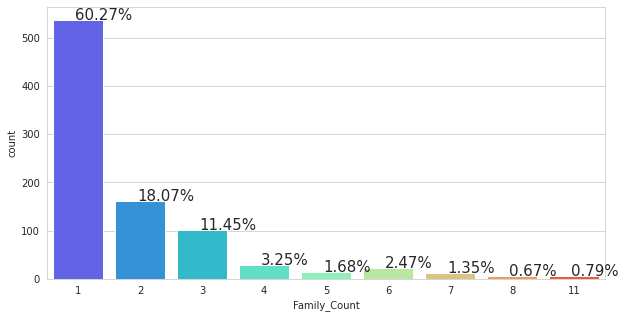

In [39]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Family_Count'], palette = 'rainbow')
bar_perc (ax,df['Family_Count'])

#### Observations

* If we define a family as groups traveling with a Sibling and/or a Spouse as well as Parents with Children, we can gain some insights to group sizes.

* When combined, we see that 60% of the passengers were traveling alone

* 18% were traveling in a party of 1 additional person.

* 11% had 2 additional people in their party.

* Less than 11% were in groups of 3 additional people or more traveling in the party.  The maximum number of additional people in a group were 10.



#### Embarked

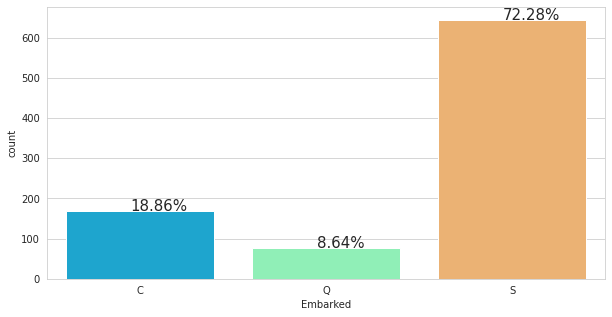

In [40]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Embarked'], palette = 'rainbow')
bar_perc (ax,df['Embarked'])

## Bi-Variate and Multi-Variate Analysis

##  Bi-variate Analysis


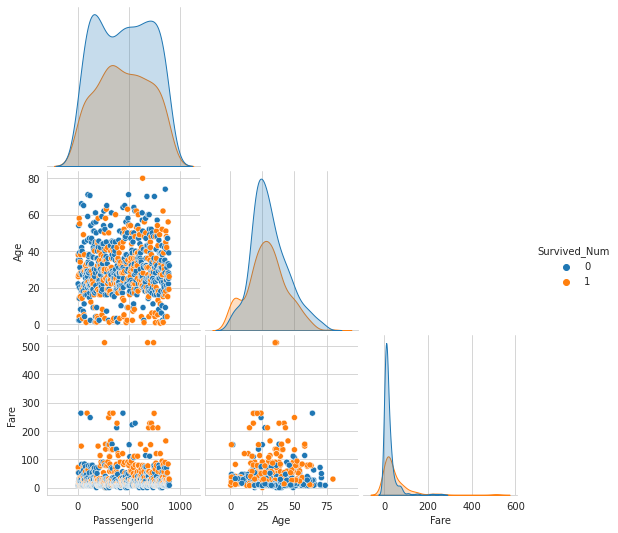

In [41]:
sns.pairplot(df, hue="Survived_Num", corner = True );

## Correlation Matrix (Numerical - Linear Relationships)

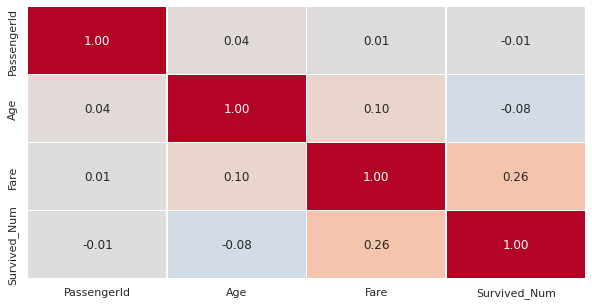

In [42]:
sns.set(rc={"figure.figsize": (10, 5)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="coolwarm",
    fmt="0.2f",
)
plt.show()

#### Observations

* Numerical variables are weakly correlated.


### Correlation Matrix (Non-Linear Relationships)



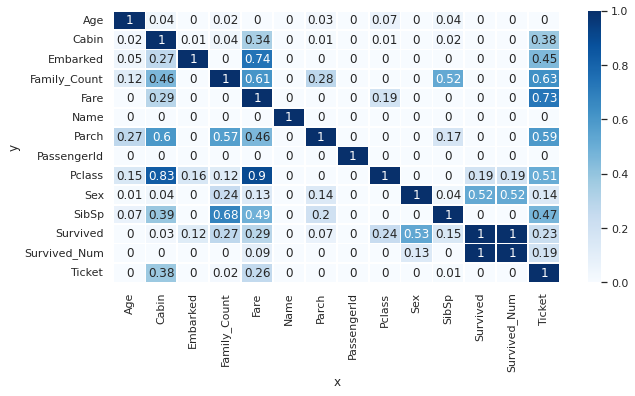

In [43]:
matrix_df = pps.matrix(df)[['x','y','ppscore']].pivot(columns = 'x', index ='y', values = 'ppscore')
matrix_df = matrix_df.apply(lambda x: round (x,2))
sns.heatmap (matrix_df, vmin=0, vmax = 1, cmap ="Blues", linewidths = 0.8, annot = True);

#### Observations

* Non-Linear relationships with decent correlation are:

** Cabin and Parch
** Cabin and Pclass
** SibSp and Family_Size
** Pclass and Fare
** Embarked and Fare
** Family_Size and Fare
** Survived and Sex


## Function to Visualize Stacked Bar Plots

In [44]:
# looking at variable relationships to our Predictor Variable, ProdTaken
def stacked_plot(x):
    sns.set (palette = 'icefire')
    tab1 = pd.crosstab (x,df['Survived_Num'], margins = True)
    print (tab1)
    print ('-' * 120)
    tab = pd.crosstab (x,df['Survived_Num'], normalize = 'index')
    tab.plot (kind = 'bar', stacked = True, figsize = (10,5))
    plt.show()

### Using Stacked Bars to visualize Categorical influence to Survival 

### Pclass

Survived_Num    0    1  All
Pclass                     
1              80  136  216
2              97   87  184
3             372  119  491
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


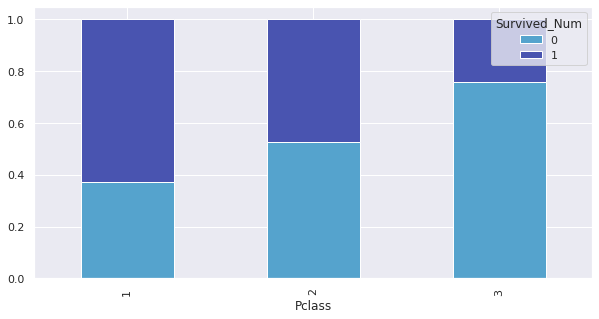

In [45]:
stacked_plot(df['Pclass'])

#### Observation

* 60% + of the passengers in Pclass = 1 (traveling 1st class) surived
* 50% of the customers traveling 2nd class survived
* A little over 20% of the customers traveling 3rd class survived.

?? why

### Sex

Survived_Num    0    1  All
Sex                        
female         81  233  314
male          468  109  577
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


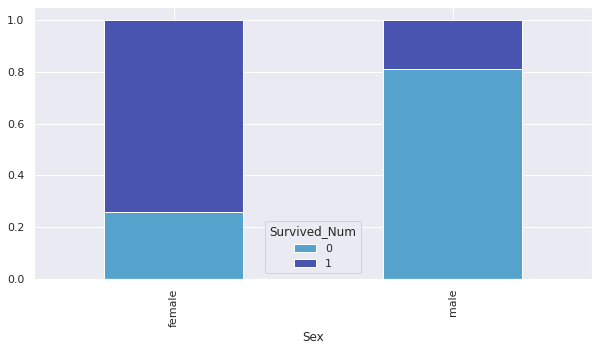

In [46]:
stacked_plot(df['Sex'])

#### Observations

* Females had the highest survival rate.  Females were 4X more likely to survive than Males.
* Need to explore the age groups


### Embarked

Survived_Num    0    1  All
Embarked                   
C              75   93  168
Q              47   30   77
S             427  217  644
All           549  340  889
------------------------------------------------------------------------------------------------------------------------


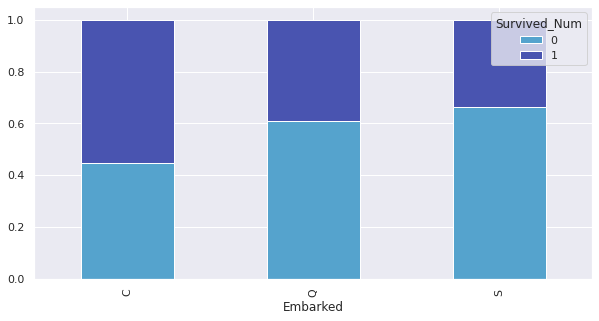

In [47]:
stacked_plot(df['Embarked'])

### Observation

* Those embarking from Q and S had roughly the same survival rate, even though the sample size of those embarking from Q is about 12% of those embarking from S. 

* Those embarking from C had a noticeably higher survival rate than those from Q or S.  Why?

### SibSp

Survived_Num    0    1  All
SibSp                      
0             398  210  608
1              97  112  209
2              15   13   28
3              12    4   16
4              15    3   18
5               5    0    5
8               7    0    7
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


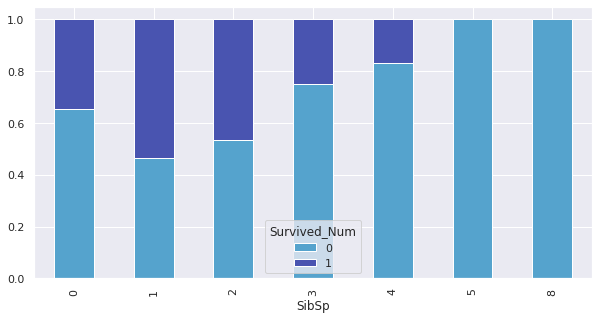

In [48]:
stacked_plot(df['SibSp'])

#### Observation

* There was a zero survival rate for those with > 4 Siblings/Parents aboard.  Why?

* Survival rates were highest amongst those having 0 to 2 Siiblings/Parents aboard?  Why?

* The survicval rate goes down noticeably > than 2 Siblings or Parents?

### Parch

Survived_Num    0    1  All
Parch                      
0             445  233  678
1              53   65  118
2              40   40   80
3               2    3    5
4               4    0    4
5               4    1    5
6               1    0    1
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


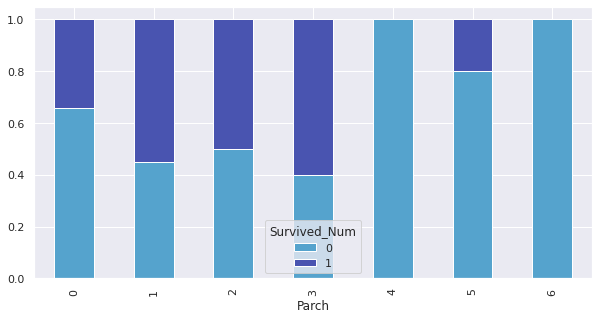

In [49]:
stacked_plot(df['Parch'])

#### Observations

* Those having 4 and 6 children in the group had a 0 survial rate from the passenger list?

* Is there anything to learn from this?



### Family_Size

Survived_Num    0    1  All
Family_Count               
1             374  163  537
2              72   89  161
3              43   59  102
4               8   21   29
5              12    3   15
6              19    3   22
7               8    4   12
8               6    0    6
11              7    0    7
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


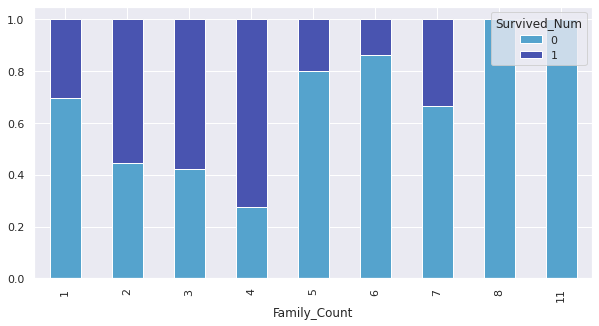

In [50]:
stacked_plot(df['Family_Count'])

#### Observations

* Those traveling in a group size (Family_Size) with more than 7 people had a zero survival rate.  Why?
* The highest survival rate was for Family_Sizes of 4.

* 70% of people traveling alone perished.  Those with 2 to 4 people in the group had the highest survival rates, between 60% to 70%.



## Multi-variate Analysis

In [51]:
# step through numerical data, pivoting on Survived_Num
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    category
 2   Pclass        891 non-null    category
 3   Name          891 non-null    category
 4   Sex           891 non-null    category
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    category
 7   Parch         891 non-null    category
 8   Ticket        891 non-null    category
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    category
 11  Embarked      889 non-null    category
 12  Survived_Num  891 non-null    int64   
 13  Family_Count  891 non-null    category
dtypes: category(10), float64(2), int64(2)
memory usage: 119.2 KB


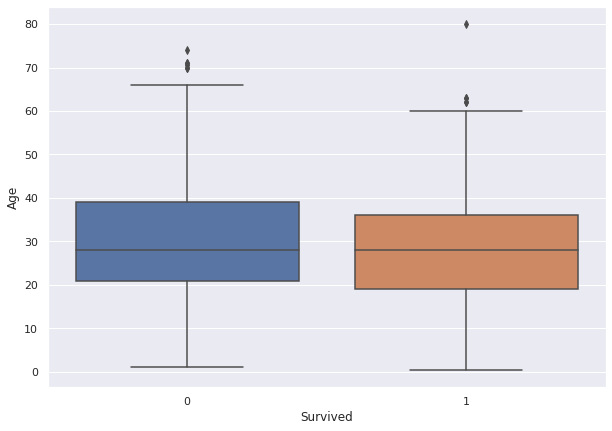

In [52]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Survived", data=df, orient="vertical");

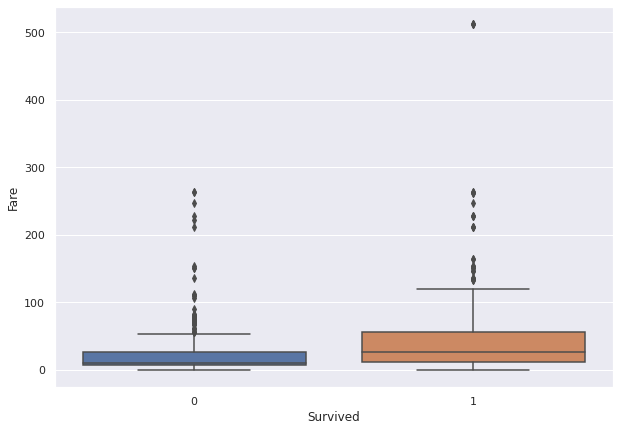

In [53]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Fare", x="Survived", data=df, orient="vertical");

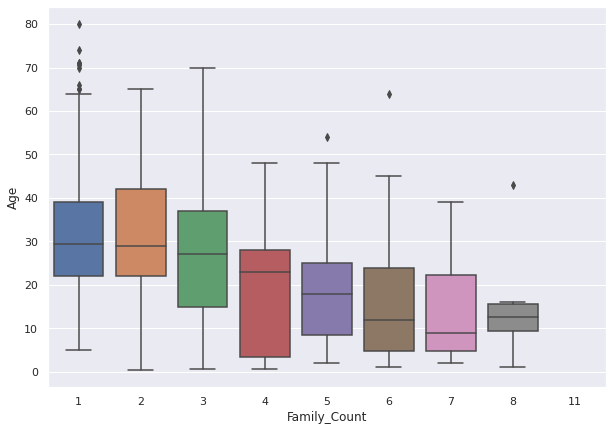

In [54]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Family_Count", data=df, orient="vertical");

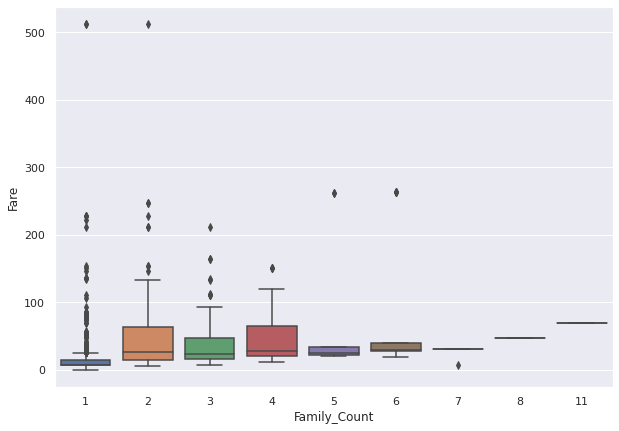

In [55]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Fare", x="Family_Count", data=df, orient="vertical");

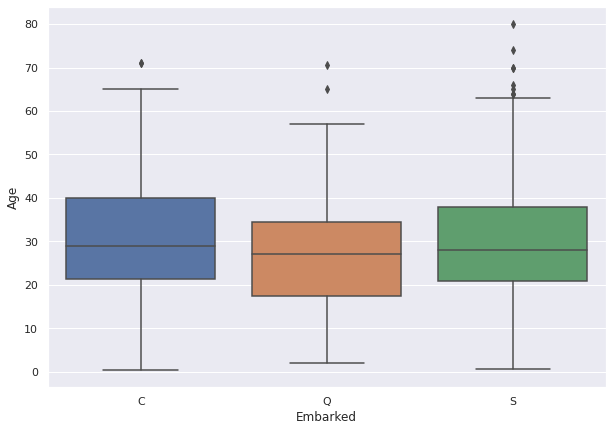

In [56]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Embarked", data=df, orient="vertical");

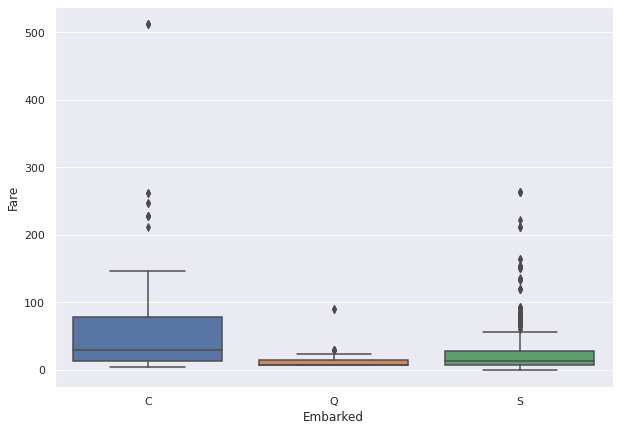

In [57]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Fare", x="Embarked", data=df, orient="vertical");

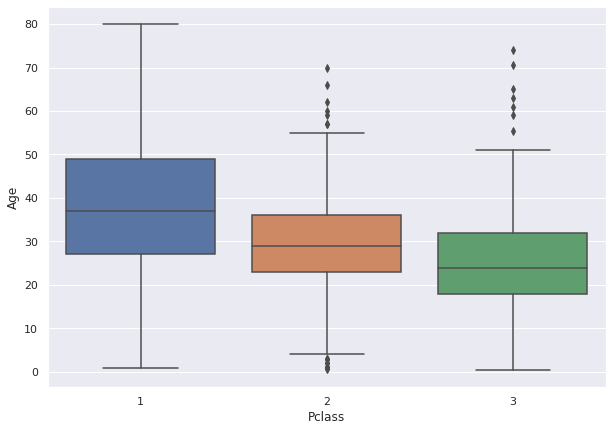

In [58]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Pclass", data=df, orient="vertical");

# <a id = "link2"></a> 2. Insights based on EDA







#   <a id = "link3"></a> 3.  Data Pre-processing & Feature Engineering

*  Preparing the data for model-building

*  Feature engineering, data prep as required


In [59]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Survived_Num      0
Family_Count      0
dtype: int64

#### Observations

* We have 177 passengers with missing ages to address.  This is about 19% of the records.  So an imputation method could meaningfully affect our ability to use it for model building.  Need to explore the best method to try to save Age.
* There are 687 Cabin numbers missing our of 891 unique records.  As such, this column is not useful and we will drop from the dataframe.


In [60]:
df.nunique()

PassengerId     891
Survived          2
Pclass            3
Name            891
Sex               2
Age              88
SibSp             7
Parch             7
Ticket          681
Fare            248
Cabin           147
Embarked          3
Survived_Num      2
Family_Count      9
dtype: int64

#### Actions:

* drop PassengerID, not useful for model building
* there are 681 unique ticket numbers, but none missing.  So some of the ticket numbers are shared across passengers.  will explore groupings in feature engineering to see if we can save it.
* drop Cabin for this model building effort. There are 687 missing, with 147 unique cabin numbers remaining.  There is a possibility if we could map the deck, we might be able to understand the survival rate for those specific cabins. Will to be helpful to this model building effort.

#### Drop features which will not add value to Model Building

In [61]:
df.drop('PassengerId',axis=1, inplace = True)

In [62]:
df.drop('Cabin',axis=1, inplace = True)

In [63]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1


#### Actions

* There are 891 unique names which will not be useful, but leveraging the surnames, we might be able to understand groupings better.  

## Feature Engineering

#### NAME - how can it be used for model building?  Surnames, Titles, etc.


In [64]:
#Explore the untility of the Surname

df[['Surname', 'Rest_of_Name']] = df['Name'].str.split(',', expand=True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count,Surname,Rest_of_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Braund,Mr. Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Heikkinen,Miss. Laina


In [65]:
df['Surname'].nunique()

667

#### Surname still has a high level of dimensionality. Possibly use titles to group passengers.  Need to extract title from Rest of Name.

In [66]:
df['Titles'] = df["Rest_of_Name"].str.split(".", expand=True)[0]

In [67]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count,Surname,Rest_of_Name,Titles
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,Braund,Mr. Owen Harris,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Heikkinen,Miss. Laina,Miss


In [68]:
# Drop the other components of name not useful for model building
drop_cols=['Name','Rest_of_Name','Surname']
df.drop(drop_cols,axis=1, inplace = True)

In [69]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count,Titles
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss


In [70]:
df['Titles'].nunique()


17

#### Observations

* There are 17 unique titles which can be further grouped.  These titles indicate marital status for females, as well as profession for men. Will group appropriately, build a new feature and then drop the ones we don't need.

In [71]:
#quick review of missingness for the new category Titles
df['Titles'].isna().sum()

0

* There are no passengers with missing Titles

#### Drop Column Survived (used for Categorical EDA earlier)

In [72]:
# drop Survived column with dtype = category.  this is no longer needed. will be using Survived_Num for the predictor variable
df.drop('Survived',axis=1, inplace = True)

### Build a Category for AGE 

* Goal is to draw insights for age ranges and their survival rates.  The Age distribution suggessts that there are children that are certainly helpless, those who whill need some assistance, those who could care for themselves, and elderly people who will need assistance to survive.  Are there any insights we could draw from these age groups?

We will look at - 

* Children under the age of 5 "Infants_Toddlers"
* Children between 6 and 12 "Pre_teens
* Children between 12 to 18 "Teens"
* Adults between 18 to 55 - "Mature_Adults"
* Adults older than 55 - "Elderly"



In [73]:
# AGE CATEGORY

df['AgeCat']=''
df['AgeCat'].loc[(df['Age'] <= 5)] ='Infants_Toddlers'
df['AgeCat'].loc[(df['Age'] > 5) & (df['Age'] <= 12)]='Pre_teens'
df['AgeCat'].loc[(df['Age'] > 12) & (df['Age'] <= 18)]='Teens'
df['AgeCat'].loc[(df['Age'] > 18) & (df['Age'] <= 55)]='Mature_Adults'
df['AgeCat'].loc[(df['Age'] > 55)]= 'Elderly'
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count,Titles,AgeCat
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr,Mature_Adults
1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs,Mature_Adults
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,Mature_Adults
3,1,female,35.0,1,0,113803,53.1000,S,1,2,Mrs,Mature_Adults
4,3,male,35.0,0,0,373450,8.0500,S,0,1,Mr,Mature_Adults
5,3,male,NaN,0,0,330877,8.4583,Q,0,1,Mr,
6,1,male,54.0,0,0,17463,51.8625,S,0,1,Mr,Mature_Adults
7,3,male,2.0,3,1,349909,21.0750,S,0,5,Master,Infants_Toddlers
8,3,female,27.0,0,2,347742,11.1333,S,1,3,Mrs,Mature_Adults
9,2,female,14.0,1,0,237736,30.0708,C,1,2,Mrs,Teens


Survived_Num        0    1  All
AgeCat                         
                  125   52  177
Elderly            28   12   40
Infants_Toddlers   13   31   44
Mature_Adults     327  208  535
Pre_teens          16    9   25
Teens              40   30   70
All               549  342  891
------------------------------------------------------------------------------------------------------------------------


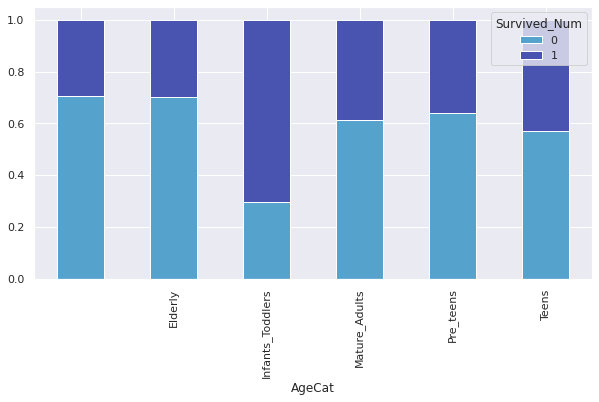

In [74]:
#Explore Survival Rate for the AgeCat
stacked_plot(df['AgeCat'])

#### observations

* Infants and Toddlers had the highest survival rate.  About 75% of those in this category survived.

* There were similar survival rates among the other categories, but not enough to draw any real inferences.

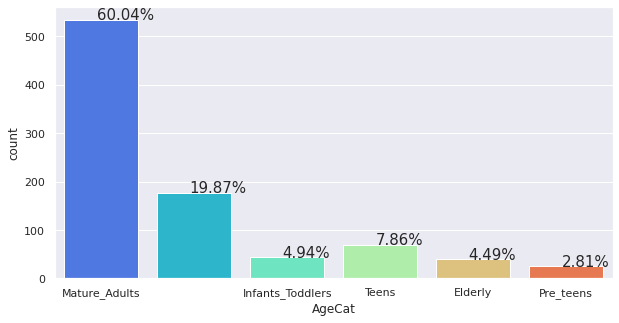

In [75]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['AgeCat'], palette = 'rainbow')
bar_perc (ax,df['AgeCat'])

#### Build a Category for TitlesCat linked to Sex

* Titles that suggest a female's status in life :  Miss/Mrs/Ms
* Titles that suggest a male's status in life:  Dr/Military/Noble/Clergy

In [76]:
#female_title_cats = {'Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'}
#male_title_cats = {'Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'}


In [77]:
df['Titles'].dtype

dtype('O')

In [78]:
df['Titles'].astype('category')
df['Titles'] = df['Titles'].str.strip()

In [79]:
df['Titles_Cat']=''
df['Titles_Cat'].loc[(df['Titles'] == 'Mrs')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Miss')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Ms')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Mlle')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Lady')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Mme')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'the Countess')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Dona')] = "Miss/Mrs/Ms"
df['Titles_Cat'].loc[(df['Titles'] == 'Dr')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Col')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Major')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Jonkheer')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Capt')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Sir')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Don')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Rev')] = "Dr/Military/Noble/Clergy"
df['Titles_Cat'].loc[(df['Titles'] == 'Mr')] = "Dr/Military/Noble/Clergy"
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_Num,Family_Count,Titles,AgeCat,Titles_Cat
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2,Mr,Mature_Adults,Dr/Military/Noble/Clergy
1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2,Mrs,Mature_Adults,Miss/Mrs/Ms
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,Mature_Adults,Miss/Mrs/Ms


Survived_Num                0    1  All
Titles_Cat                             
                           17   23   40
Dr/Military/Noble/Clergy  451   87  538
Miss/Mrs/Ms                81  232  313
All                       549  342  891
------------------------------------------------------------------------------------------------------------------------


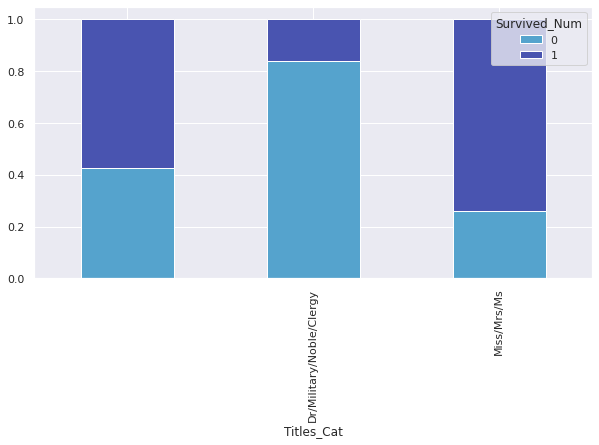

In [80]:
#Explore Survival Rate for the Titles_Cat
stacked_plot(df['Titles_Cat'])

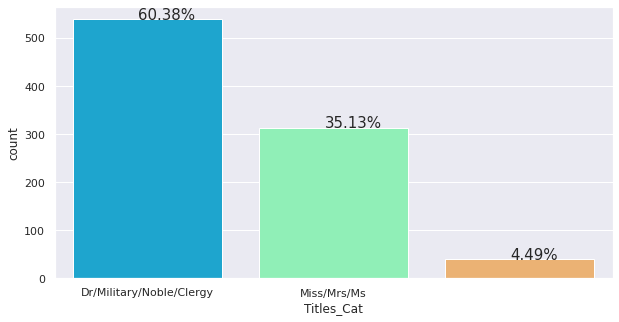

In [81]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Titles_Cat'], palette = 'rainbow')
bar_perc (ax,df['Titles_Cat'])

#### Create a Family Size category to help reduce dimensionality from Family_Count, but preserve information

In [82]:
#Create a new category called FamilySize
#convert SibSp and Parch back to integer dtype

df['SibSp']=df['SibSp'].astype('int64')


df['FamilySize']=''
df['FamilySize'].loc[(df['SibSp'] <= 2)]='small'
df['FamilySize'].loc[(df['SibSp'] > 2) & (df['SibSp']<=5)]='medium'
df['FamilySize'].loc[(df['SibSp'] > 5)]='large'

In [83]:
df['Parch']=df['Parch'].astype('int64')

#### Identify those who are alone

In [84]:
# Category to identify passengers who could be alone

df['IsAlone']=''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) >0) ]='No'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0) ]='Yes'


#### Create an Age Category by Sex

In [85]:
#Category to tell if a Age Category by Sex

df['SexCat']=''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] <= 5)] ='male_Infants_Toddlers'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 5) & (df['Age'] <= 12)]='male_Pre_teens'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 12) & (df['Age'] <= 18)]='male_Teens'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 18) & (df['Age'] <= 55)]='male_Mature_Adults'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 55)]= "male_Elderly"
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] <= 5)] ='female_Infants_Toddlers'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 5) & (df['Age'] <= 12)]='female_Pre_teens'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 12) & (df['Age'] <= 18)]='female_Teens'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 18) & (df['Age'] <= 55)]='female_Mature_Adults'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 55)]= "female_Elderly"

Survived_Num               0    1  All
SexCat                                
                         125   52  177
female_Elderly             1    8    9
female_Infants_Toddlers    5   16   21
female_Mature_Adults      41  143  184
female_Pre_teens           8    3   11
female_Teens               9   27   36
male_Elderly              27    4   31
male_Infants_Toddlers      8   15   23
male_Mature_Adults       286   65  351
male_Pre_teens             8    6   14
male_Teens                31    3   34
All                      549  342  891
------------------------------------------------------------------------------------------------------------------------


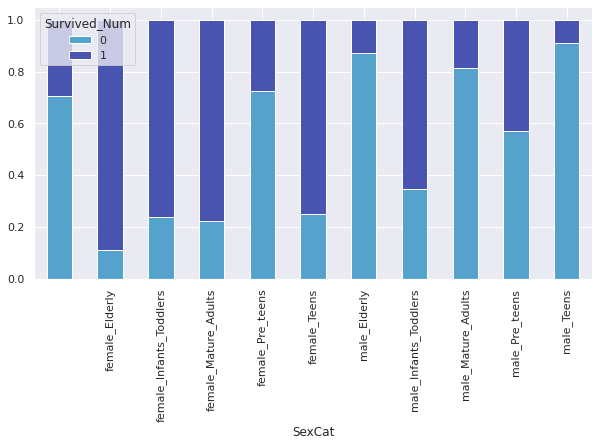

In [86]:
#Explore Survival Rate for the Titles_Cat
stacked_plot(df['SexCat'])

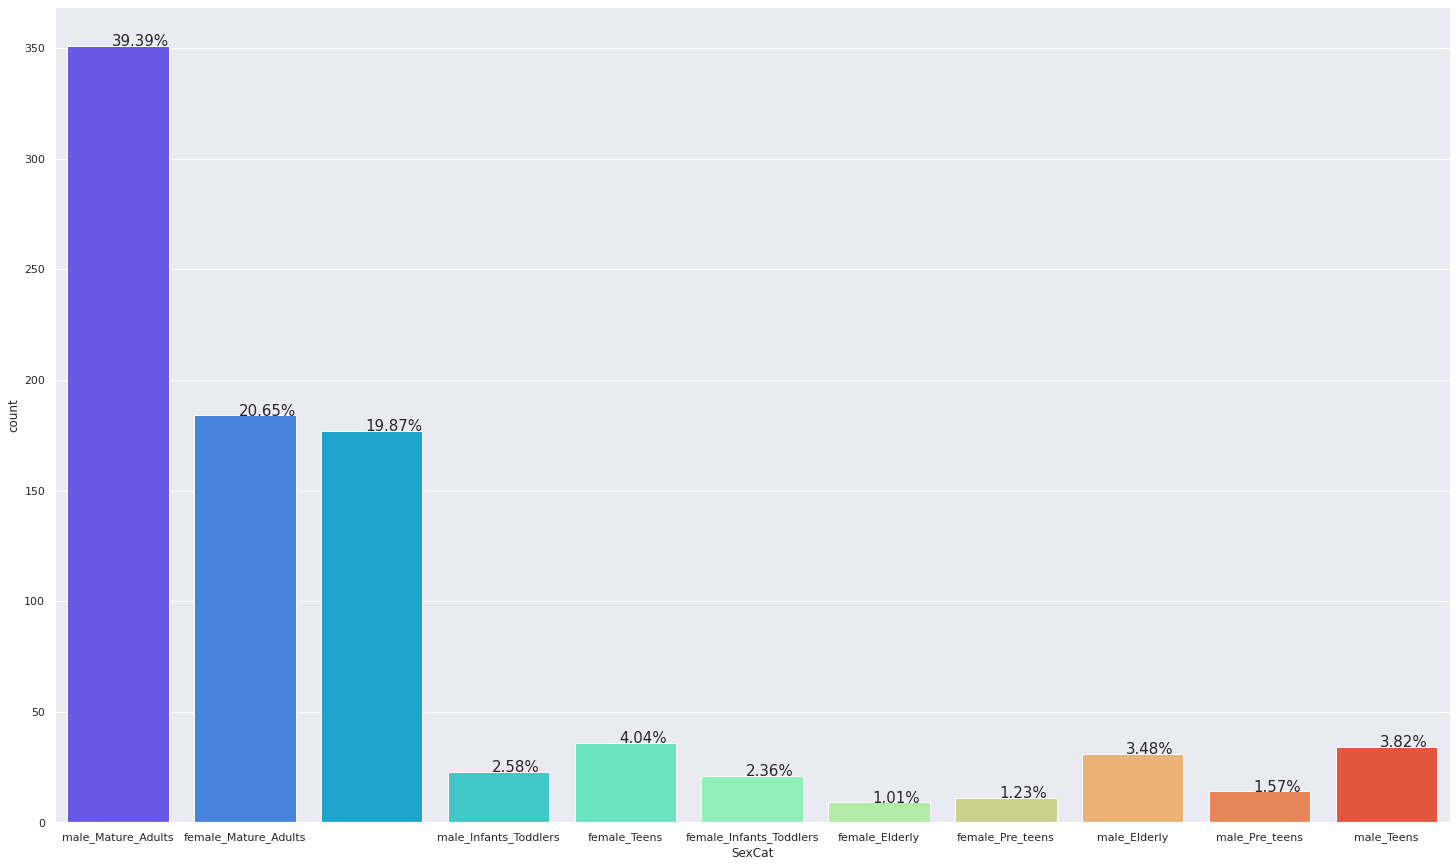

In [87]:
plt.figure(figsize = (25,15))
ax = sns.countplot(df['SexCat'], palette = 'rainbow')
bar_perc (ax,df['SexCat'])

Survived_Num    0    1  All
IsAlone                    
No            175  179  354
Yes           374  163  537
All           549  342  891
------------------------------------------------------------------------------------------------------------------------


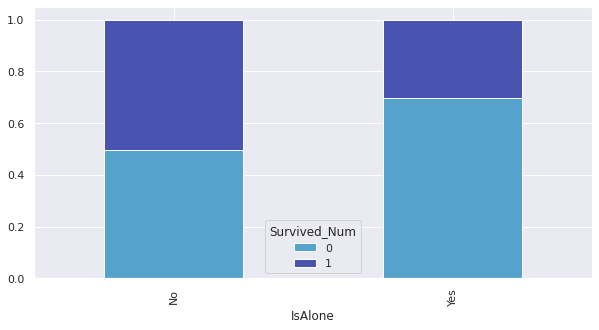

In [88]:
#Explore Survival Rate for the IsAlone
stacked_plot(df['IsAlone'])

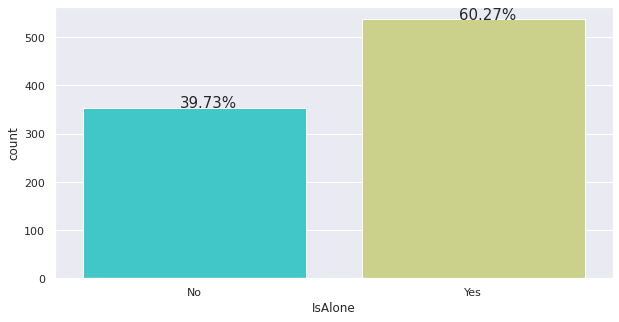

In [89]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['IsAlone'], palette = 'rainbow')
bar_perc (ax,df['IsAlone'])

#### Build a feature to identify married females

In [90]:
#Explore married females

df['Is_Married'] = 'Unknown'
df['Is_Married'].loc[(df['Sex'] == 'female') & (df['Titles'] == 'Mrs')] ='Married_Females'

Survived_Num       0    1  All
Is_Married                    
Married_Females   26   99  125
Unknown          523  243  766
All              549  342  891
------------------------------------------------------------------------------------------------------------------------


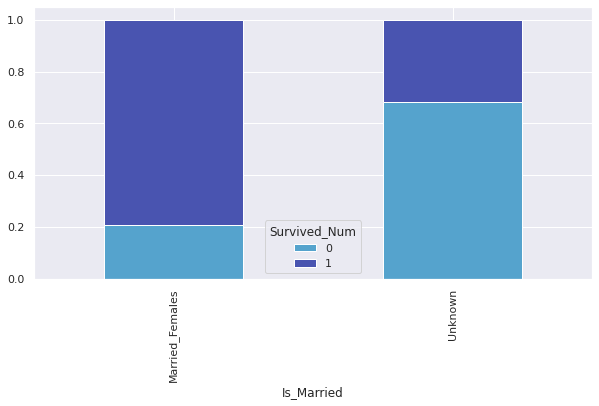

In [91]:
#Explore Survival Rate for the IsMarried
stacked_plot(df['Is_Married'])

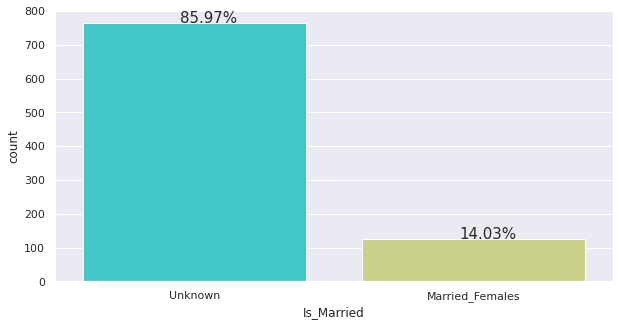

In [92]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Is_Married'], palette = 'rainbow')
bar_perc (ax,df['Is_Married'])

#### Build a feature to group ticket numbers 

In [93]:
# Creating "Ticket Frequency" Feature
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

Survived_Num        0    1  All
Ticket_Frequency               
1                 384  163  547
2                  80  108  188
3                  19   44   63
4                  22   22   44
5                  10    0   10
6                  18    0   18
7                  16    5   21
All               549  342  891
------------------------------------------------------------------------------------------------------------------------


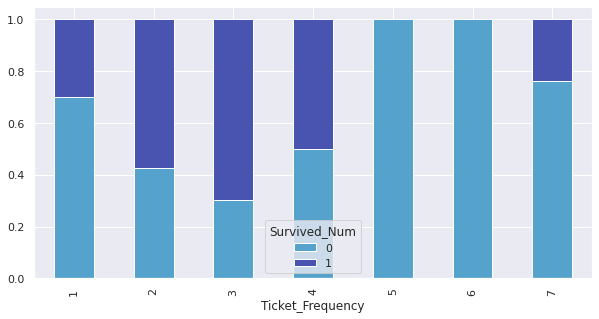

In [94]:
stacked_plot(df['Ticket_Frequency'])

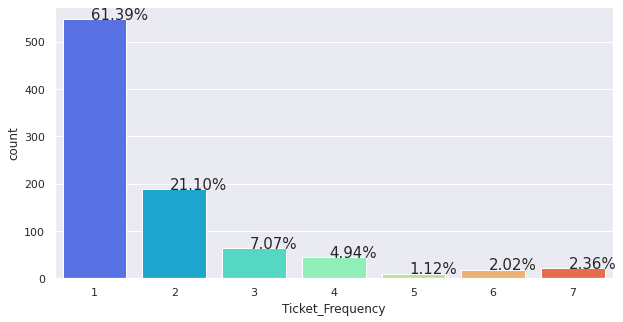

In [95]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Ticket_Frequency'], palette = 'rainbow')
bar_perc (ax,df['Ticket_Frequency'])

#   <a id = "link4"></a> 4.  Supervised Machine Learning Model Building + Tuning

In [96]:
#load additional libraries for model building


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb


In [97]:
#restore the Survived variable being used for EDA to its original name, but with CAPS to indicate it has been altered
df.rename(columns={'Survived_Num': 'SURVIVED'}, inplace=True)

In [98]:
df['SURVIVED'].describe().T

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: SURVIVED, dtype: float64

## Model evaluation criteria

1 = "Yes" or "passenger survived"
0 = "No" or "passenger did not survive"


True Positive (TP)  is:  

Predict they will survive and they survive.  Predict = Y, Actual = Y

False Positive (FP)  is:

Predict they will survive and they do not survive.  Predict = Y, Actual = N

True Negative (TN)  is:

Predict they will not survive and they do not survive.  Predict = N, Actual = N

False Negative (FN)  is:  

Predict they will not survive and they do survive.  Predict = N, Actual = Y


1.  Identify where the Model can fail and the influence on the reader of the prediction:

    * Predicting that the passenger WILL survive and they do not survive.  (FP)
    
    * Predicting that the passenger WILL NOT survive and they do survive. (FN)

    * Predicting that the passenger WILL survive and they do indeed surve (TP).

    * Predicting that the passenger WILL NOT survive and they do NOT survive (TN).

2.  Which of the Model failure mode is more impactful to the reader of this prediction?

    *   Maximizing the number of passengers that we predict WILL survive and they do indeed surve (TP) while also minimize the number of passengers we predict will SURVIVE and they don't SURVIVE (FP).
    
3. Likewise, given there are relatively large number of NEGATIVES, we will use PRECISION.  

Precision =# True positives / # predicted positive = TP/(TP+FP)

****  Maximizing recall will minimize the false-negative errors.Maximizing precision will minimize the false-positive errors. The F-measure is charmonic mean of precision and recall, giving each the same weighting. (ref: https://machinelearningmastery.com/fbeta-measure-for-machine-learning/)




## Build pipelines


In [99]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_val)
    cm = metrics.confusion_matrix(y_actual, By_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Before model building, we need to drop columns that were sources for engineered features.  Specifically, those with high dimensionality that we simplified.  We will drop these in the training and test split.

In [100]:
df.drop('Ticket',axis=1, inplace = True)
df.drop('Titles',axis=1, inplace = True)


In [101]:
obj_cols_2 = ['AgeCat','Titles_Cat','FamilySize','IsAlone'
              ,'SexCat','Is_Married','Ticket_Frequency'
              ,'SibSp','Parch']

df[obj_cols_2] = df[obj_cols_2].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            891 non-null    category
 1   Sex               891 non-null    category
 2   Age               714 non-null    float64 
 3   SibSp             891 non-null    category
 4   Parch             891 non-null    category
 5   Fare              891 non-null    float64 
 6   Embarked          889 non-null    category
 7   SURVIVED          891 non-null    int64   
 8   Family_Count      891 non-null    category
 9   AgeCat            891 non-null    category
 10  Titles_Cat        891 non-null    category
 11  FamilySize        891 non-null    category
 12  IsAlone           891 non-null    category
 13  SexCat            891 non-null    category
 14  Is_Married        891 non-null    category
 15  Ticket_Frequency  891 non-null    category
dtypes: category(13), float64(2

In [102]:
from sklearn.model_selection import train_test_split

X = df.drop('SURVIVED',axis=1)     # Predictor feature columns
y = df['SURVIVED']   # Target Variable

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=99, stratify = y)
# using 29 as the random seed
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(623, 15) (268, 15)
(623,) (268,)


### check the split of the training and validation data

In [103]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [104]:
X_train.nunique()
print (X_train['Is_Married'])


443            Unknown
431    Married_Females
623            Unknown
37             Unknown
330            Unknown
            ...       
214            Unknown
297            Unknown
581    Married_Females
323    Married_Females
400            Unknown
Name: Is_Married, Length: 623, dtype: category
Categories (2, object): ['Married_Females', 'Unknown']


### encode categorical variables

In [105]:
X_train['Embarked'].nunique

<bound method IndexOpsMixin.nunique of 443    S
431    S
623    S
37     S
330    Q
      ..
214    Q
297    S
581    C
323    S
400    S
Name: Embarked, Length: 623, dtype: category
Categories (3, object): ['C', 'Q', 'S']>

In [106]:
X_train['Embarked'].isnull().sum()

1

In [107]:
# replacing null values in Embarked with highest frequency value, 'S'
X_train['Embarked'].fillna('S', inplace = True)
X_test['Embarked'].fillna('S', inplace = True)

In [108]:
X_train['Embarked'].isnull().sum()

0

In [109]:
X_test['Embarked'].isnull().sum()

0

In [110]:
# one-hote encode Categorical columns. : not a great fit when we try to translate the tuned model to unseen data
# could have dimensional mismatches

#X_train=pd.get_dummies(X_train,drop_first=True)
#X_test=pd.get_dummies(X_test,drop_first=True)
#print(X_train.shape, X_test.shape)

from sklearn import preprocessing  
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family_Count'
            ,'AgeCat','Titles_Cat','FamilySize', 'IsAlone', 'SexCat'
            ,'Is_Married','Ticket_Frequency']

le = preprocessing.LabelEncoder()
X_train['Pclass'] = le.fit_transform(X_train['Pclass'])
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train['SibSp'] = le.fit_transform(X_train['SibSp'])
X_train['Parch'] = le.fit_transform(X_train['Parch'])
X_train['Family_Count'] = le.fit_transform(X_train['Family_Count'])
X_train['AgeCat'] = le.fit_transform(X_train['AgeCat'])
X_train['Titles_Cat'] = le.fit_transform(X_train['Titles_Cat'])
X_train['FamilySize'] = le.fit_transform(X_train['FamilySize'])
X_train['IsAlone'] = le.fit_transform(X_train['IsAlone'])
X_train['SexCat'] = le.fit_transform(X_train['SexCat'])
X_train['Is_Married'] = le.fit_transform(X_train['Is_Married'])
X_train['Ticket_Frequency'] = le.fit_transform(X_train['Ticket_Frequency'])
X_train['Embarked'] = le.fit_transform(X_train['Embarked'])



X_test['Pclass'] = le.fit_transform(X_test['Pclass'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test['SibSp'] = le.fit_transform(X_test['SibSp'])
X_test['Parch'] = le.fit_transform(X_test['Parch'])
X_test['Family_Count'] = le.fit_transform(X_test['Family_Count'])
X_test['AgeCat'] = le.fit_transform(X_test['AgeCat'])
X_test['Titles_Cat'] = le.fit_transform(X_test['Titles_Cat'])
X_test['FamilySize'] = le.fit_transform(X_test['FamilySize'])
X_test['IsAlone'] = le.fit_transform(X_test['IsAlone'])
X_test['SexCat'] = le.fit_transform(X_test['SexCat'])
X_test['Is_Married'] = le.fit_transform(X_test['Is_Married'])
X_test['Ticket_Frequency'] = le.fit_transform(X_test['Ticket_Frequency'])
X_test['Embarked'] = le.fit_transform(X_test['Embarked'])







#X_test[cat_cols] = le.fit_transform(X_test[cat_cols])

print(X_train.shape, X_test.shape)

(623, 15) (268, 15)


### check true : false ratio for Survived_Num (i.e., 0=false "did not survive", 1 = true "survived")

In [111]:
print("Original Survived_Num True Values : {0} ({1:0.2f}%)".format(len(df.loc[df['SURVIVED'] == 1]), (len(df.loc[df['SURVIVED'] == 1])/len(df.index)) * 100))
print("Original Survived_Num False Values: {0} ({1:0.2f}%)".format(len(df.loc[df['SURVIVED'] == 0]), (len(df.loc[df['SURVIVED'] == 0])/len(df.index)) * 100))
print("")
print("Training Survived_Num True Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Survived_Num False Values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Survived_Num True Values     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Survived_Num False Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Survived_Num True Values : 342 (38.38%)
Original Survived_Num False Values: 549 (61.62%)

Training Survived_Num True Values : 239 (38.36%)
Training Survived_Num False Values: 384 (61.64%)

Test Survived_Num True Values     : 103 (38.43%)
Test Survived_Num False Values    : 165 (61.57%)



### predictor variable is imbalanced, explore undersampling and oversampling using SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

### missing value imputation :  use mean value imputation on train and test splits separately

In [113]:
X_test['Age'].isna().sum()

47

In [114]:
X_train['Age'].isna().sum()

130

In [115]:
missing_col = ['Age']
#Use median to impute the missing values
for i in missing_col:
    X_test.loc[X_test.loc[:,i].isnull(),i]=X_test.loc[:,i].median()
    X_train.loc[X_train.loc[:,i].isnull(),i]=X_train.loc[:,i].median()

X_test['Age'].isna().sum()
X_train['Age'].isna().sum()


0

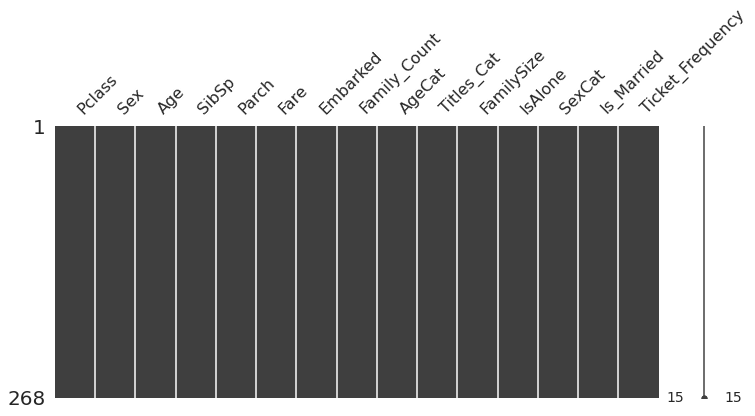

In [116]:
mi.matrix (X_test, figsize = (12,5));

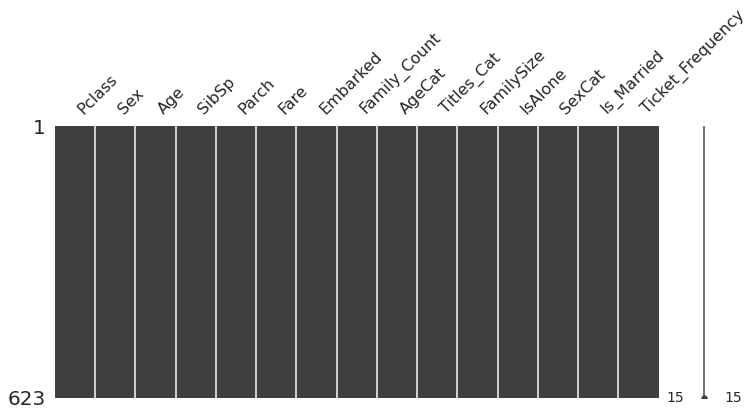

In [117]:
mi.matrix (X_train, figsize = (12,5));

In [118]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Count,AgeCat,Titles_Cat,FamilySize,IsAlone,SexCat,Is_Married,Ticket_Frequency
443,1,0,28.0,0,0,13.0000,2,0,3,2,2,1,3,1,0
431,2,0,29.0,1,0,16.1000,2,1,0,2,2,0,0,0,1
623,2,1,21.0,0,0,7.8542,2,0,3,1,2,1,8,1,0


### oversampling : create oversampled training sets

In [119]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=99)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 239
Before UpSampling, counts of label 'No': 384 

After UpSampling, counts of label 'Yes': 384
After UpSampling, counts of label 'No': 384 

After UpSampling, the shape of train_X: (768, 15)
After UpSampling, the shape of train_y: (768,) 



### undersampling  : create undersampled training sets

In [120]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [121]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 239
Before Under Sampling, counts of label 'No': 384 

After Under Sampling, counts of label 'Yes': 239
After Under Sampling, counts of label 'No': 239 

After Under Sampling, the shape of train_X: (478, 15)
After Under Sampling, the shape of train_y: (478,) 



### run model pipelines for imbalanced, undersampled, and oversampled test-training splits

In [122]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=29,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=99)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=99
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 78.955838779086
RF: 74.50741890959281
GBM: 79.28584617612628
ADB: 75.29840663402352
XGB: 79.27865052159116
DTREE: 69.98107305541139


### oversampling

In [123]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=99)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=99,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=99)),
            ]
        ),
    )
)

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=99
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 82.10398936938684
RF: 83.49672517187143
GBM: 84.40592803252649
ADB: 82.84232738342328
XGB: 85.69265596256541
DTREE: 80.0657084323554


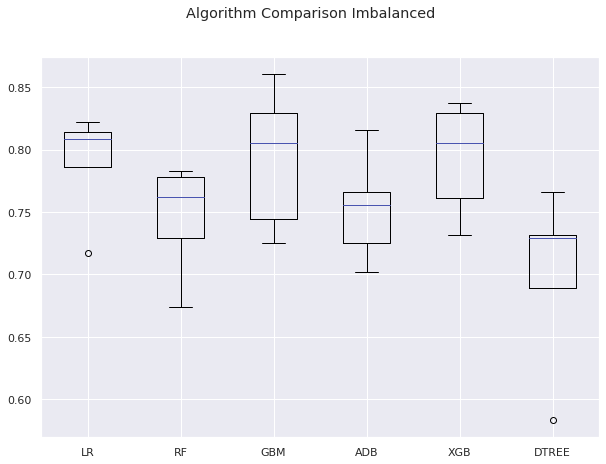

In [124]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Imbalanced")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

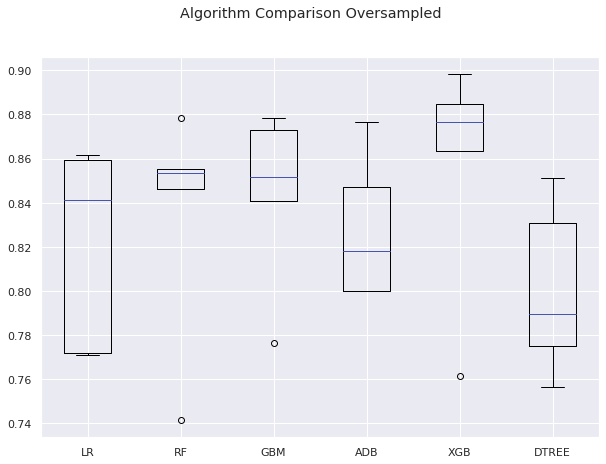

In [125]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Oversampled")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

# Hyperparameter Tuning

* Use the Oversampled training data set

* explore tuning using GridSearchCV and RandomSearchCV 

* select the best parameters and then evaluate the model performance with Recall as our eval metric

In [126]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
## Using oversampling training data set
def get_metrics_score(model, flag=True):
 

    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train_over)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train_over, y_train_over)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train_over, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train_over, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train_over, y_train_over))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train_over, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train_over, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [127]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


# XGBoost


will run GridSearchCV and RandomSearchCV to find best hyperparameters for XGB

### GridSearchCV

In [128]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=99,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.5], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.5, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__subsample': 1} with CV score=0.8760215611581808:
CPU times: user 9min 37s, sys: 7.11 s, total: 9min 44s
Wall time: 9min 43s


In [129]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=99,
        n_estimators=50,
        scale_pos_weight=1,
        subsample=1,
        learning_rate=0.5,
        gamma=3 ,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, learning_rate=0.5, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=99,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8619791666666666
Accuracy on test set :  0.8171641791044776
Recall on training set :  0.8489583333333334
Recall on test set :  0.8058252427184466
Precision on training set :  0.8716577540106952
Precision on test set :  0.7410714285714286


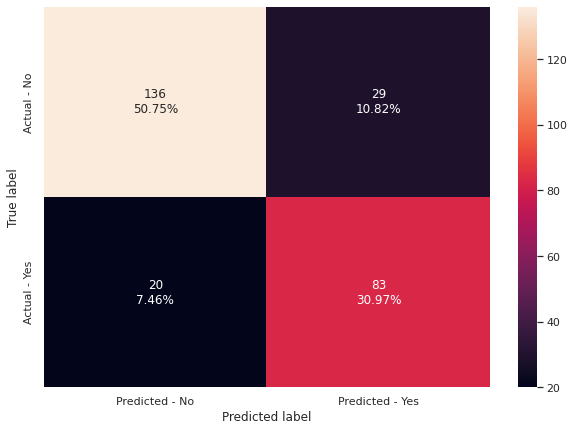

In [130]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### observation






### RandomSearchCV

In [131]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=99,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.5],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=99)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 5, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9688311688311689:
CPU times: user 28.2 s, sys: 408 ms, total: 28.7 s
Wall time: 28.6 s


In [132]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=99,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=1,
                subsample=1,
                learning_rate= 0.01,
                max_depth = 4, reg_lambda = 5
            ),
        ),
    ]
)
# Fit the model on training data
# eval_metric='loglosss
xgb_tuned2.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, learning_rate=0.01,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=99,
                               reg_alpha=0, reg_lambda=5, scale_pos_weight=10,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.6171875
Accuracy on test set :  0.48880597014925375
Recall on training set :  0.9921875
Recall on test set :  0.941747572815534
Precision on training set :  0.5669642857142857
Precision on test set :  0.42543859649122806


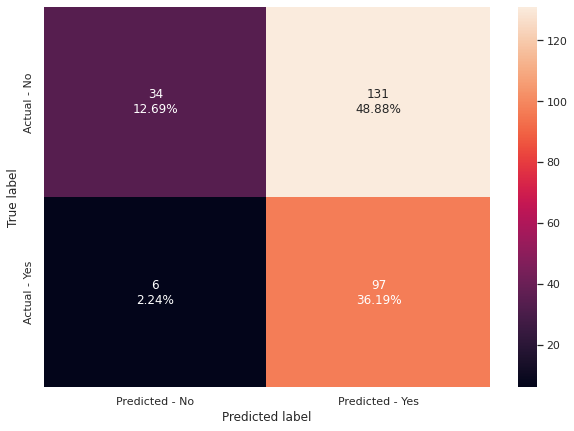

In [133]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### observation





# Random Forest Model Building

## GridSearchCV

In [134]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
sorted(pipeline.get_params().keys())

['memory',
 'randomforestclassifier',
 'randomforestclassifier__bootstrap',
 'randomforestclassifier__ccp_alpha',
 'randomforestclassifier__class_weight',
 'randomforestclassifier__criterion',
 'randomforestclassifier__max_depth',
 'randomforestclassifier__max_features',
 'randomforestclassifier__max_leaf_nodes',
 'randomforestclassifier__max_samples',
 'randomforestclassifier__min_impurity_decrease',
 'randomforestclassifier__min_impurity_split',
 'randomforestclassifier__min_samples_leaf',
 'randomforestclassifier__min_samples_split',
 'randomforestclassifier__min_weight_fraction_leaf',
 'randomforestclassifier__n_estimators',
 'randomforestclassifier__n_jobs',
 'randomforestclassifier__oob_score',
 'randomforestclassifier__random_state',
 'randomforestclassifier__verbose',
 'randomforestclassifier__warm_start',
 'standardscaler',
 'standardscaler__copy',
 'standardscaler__with_mean',
 'standardscaler__with_std',
 'steps',
 'verbose']

In [135]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=99))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange (50,300,50),
    "randomforestclassifier__min_samples_leaf": np.arange (1,6,1),
    "randomforestclassifier__max_features": [0.7,0.9,'log2','auto'],
    "randomforestclassifier__max_samples":[0.7,0.9, None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_samples': 0.9, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 50} 
Score: 0.8169625050082987
CPU times: user 6min 48s, sys: 2.35 s, total: 6min 50s
Wall time: 6min 50s


In [136]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=99,
        max_features='log2',
        max_samples=0.9,
        min_samples_leaf=5,
        n_estimators=50,
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='log2',
                                        max_leaf_nodes=None, max_samples=0.9,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=99,
                                        verbose=0, warm_start=False))],
         verbose=False

Accuracy on training set :  0.87109375
Accuracy on test set :  0.835820895522388
Recall on training set :  0.8463541666666666
Recall on test set :  0.8058252427184466
Precision on training set :  0.8904109589041096
Precision on test set :  0.7757009345794392


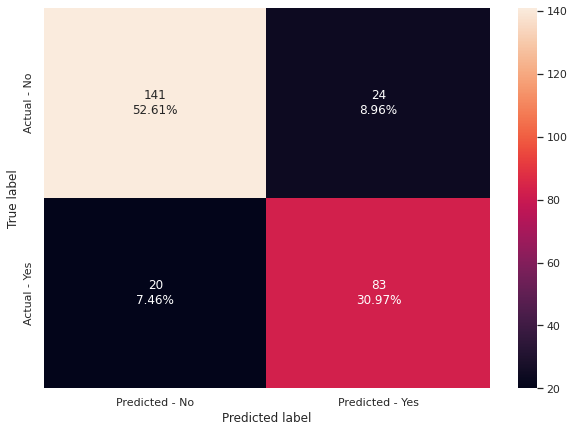

In [137]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

### observation




### RandomSearchCV

In [138]:
%%time 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=99))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange (50,300,50),
    "randomforestclassifier__min_samples_leaf": np.arange (1,6,1),
    "randomforestclassifier__max_features": [0.7,0.9,'log2','auto'],
    "randomforestclassifier__max_samples":[0.7,0.9, None]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=99)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_samples': 0.7, 'randomforestclassifier__max_features': 0.7} with CV score=0.8775928109256539:
CPU times: user 1min 13s, sys: 386 ms, total: 1min 14s
Wall time: 1min 14s


In [139]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=99,
        max_features=0.7,
        max_samples=0.7,
        min_samples_leaf=4,
        n_estimators=50,
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=0.7,
                                        max_leaf_nodes=None, max_samples=0.7,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=4, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=99,
                                        verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.8971354166666666
Accuracy on test set :  0.8395522388059702
Recall on training set :  0.8645833333333334
Recall on test set :  0.7669902912621359
Precision on training set :  0.924791086350975
Precision on test set :  0.8061224489795918


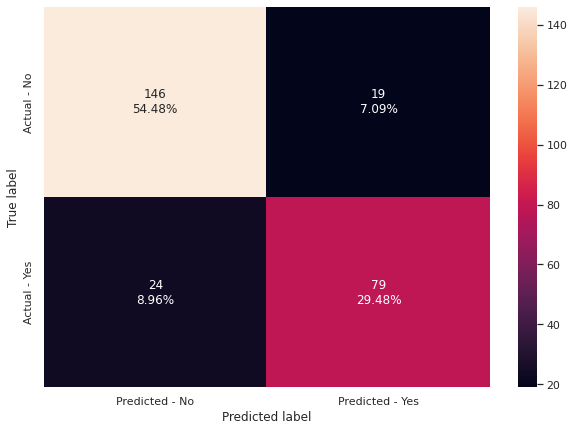

In [140]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

# <a id = "link6"></a> 6. Compare all models and evaluate

In [141]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, rf_tuned1, rf_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [142]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "RandomForest with GridSearchCV",
            "RandomForest with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test precision
comparison_frame.sort_values(by="Test_Precision", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
3,RandomForest with RandomizedSearchCV,0.897135,0.839552,0.864583,0.766990,0.924791,0.806122
2,RandomForest with GridSearchCV,0.871094,0.835821,0.846354,0.805825,0.890411,0.775701
0,XGBoost with GridSearchCV,0.861979,0.817164,0.848958,0.805825,0.871658,0.741071
1,XGBoost with RandomizedSearchCV,0.617188,0.488806,0.992188,0.941748,0.566964,0.425439


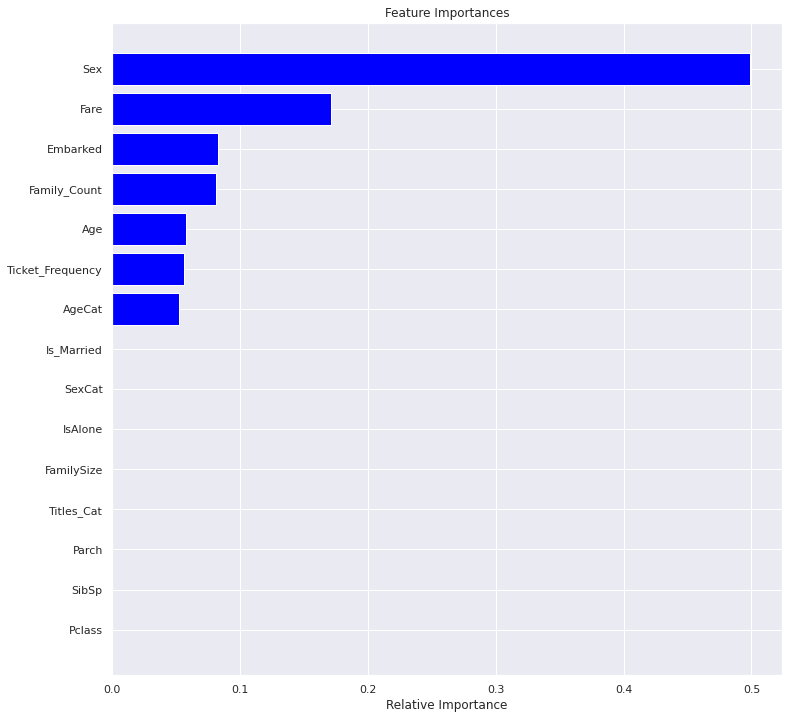

In [143]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Predictions

In [144]:
# Importing data and displaying some row


dataset_filename_2 = '/content/drive/MyDrive/DATA_SCIENCE/Kaggel_Projects/Titanic/test.csv'

#Load Dataset
data_2 = pd.read_csv(dataset_filename_2)

# create copy of original data
df_test = data_2.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in the test data set.')  # f-string

There are 418 rows and 11 columns in the test data set.


In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [146]:


df_test['Family_Count'] = df_test.apply(
    lambda row: row.SibSp + row.Parch + 1, axis=1)

df_test['Family_Count']=df_test['Family_Count'].astype('category')
df_test.drop('PassengerId',axis=1, inplace = True)

df_test.drop('Cabin',axis=1, inplace = True)
df_test[['Surname', 'Rest_of_Name']] = df_test['Name'].str.split(',', expand=True)

df_test['Titles'] = df_test["Rest_of_Name"].str.split(".", expand=True)[0]

drop_cols=['Name','Rest_of_Name','Surname']
df_test.drop(drop_cols,axis=1, inplace = True)



# AGE CATEGORY

df_test['AgeCat']=''
df_test['AgeCat'].loc[(df_test['Age'] <= 5)] ='Infants_Toddlers'
df_test['AgeCat'].loc[(df_test['Age'] > 5) & (df_test['Age'] <= 12)]='Pre_teens'
df_test['AgeCat'].loc[(df_test['Age'] > 12) & (df_test['Age'] <= 18)]='Teens'
df_test['AgeCat'].loc[(df_test['Age'] > 18) & (df_test['Age'] <= 55)]='Mature_Adults'
df_test['AgeCat'].loc[(df_test['Age'] > 55)]= 'Elderly'


df_test['Titles'].astype('category')
df_test['Titles'] = df_test['Titles'].str.strip()


df_test['Titles_Cat']=''
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Mrs')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Miss')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Ms')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Mlle')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Lady')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Mme')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'the Countess')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Dona')] = "Miss/Mrs/Ms"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Dr')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Col')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Major')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Jonkheer')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Capt')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Sir')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Don')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Rev')] = "Dr/Military/Noble/Clergy"
df_test['Titles_Cat'].loc[(df_test['Titles'] == 'Mr')] = "Dr/Military/Noble/Clergy"



df_test['SibSp']=df_test['SibSp'].astype('int64')


df_test['FamilySize']=''
df_test['FamilySize'].loc[(df_test['SibSp'] <= 2)]='small'
df_test['FamilySize'].loc[(df_test['SibSp'] > 2) & (df_test['SibSp']<=5)]='medium'
df_test['FamilySize'].loc[(df_test['SibSp'] > 5)]='large'


df_test['Parch']=df_test['Parch'].astype('int64')


# Category to identify passengers who could be alone

df_test['IsAlone']=''
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) >0) ]='No'
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) == 0) ]='Yes'


#Category to tell if a Age Category by Sex

df_test['SexCat']=''
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] <= 5)] ='male_Infants_Toddlers'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 5) & (df_test['Age'] <= 12)]='male_Pre_teens'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 12) & (df_test['Age'] <= 18)]='male_Teens'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 18) & (df_test['Age'] <= 55)]='male_Mature_Adults'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 55)]= "male_Elderly"
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] <= 5)] ='female_Infants_Toddlers'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 5) & (df_test['Age'] <= 12)]='female_Pre_teens'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 12) & (df_test['Age'] <= 18)]='female_Teens'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 18) & (df_test['Age'] <= 55)]='female_Mature_Adults'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 55)]= "female_Elderly"



#Explore married females

df_test['Is_Married'] = 0
df_test['Is_Married'].loc[(df_test['Sex'] == 'female') & (df_test['Titles'] == 'Mrs')] ='Married_Females'


# Creating "Ticket Frequency" Feature
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier
df_test['Ticket_Frequency'] = df_test.groupby('Ticket')['Ticket'].transform('count')




In [147]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    int64   
 1   Sex               418 non-null    object  
 2   Age               332 non-null    float64 
 3   SibSp             418 non-null    int64   
 4   Parch             418 non-null    int64   
 5   Ticket            418 non-null    object  
 6   Fare              417 non-null    float64 
 7   Embarked          418 non-null    object  
 8   Family_Count      418 non-null    category
 9   Titles            418 non-null    object  
 10  AgeCat            418 non-null    object  
 11  Titles_Cat        418 non-null    object  
 12  FamilySize        418 non-null    object  
 13  IsAlone           418 non-null    object  
 14  SexCat            418 non-null    object  
 15  Is_Married        418 non-null    object  
 16  Ticket_Frequency  418 non-

In [148]:
cat_cols =['Sex','Titles','Titles_Cat','AgeCat','FamilySize','SexCat','Is_Married','Ticket','IsAlone'
            ,'Ticket_Frequency','Pclass','SibSp','Parch','Embarked']
df_test[cat_cols]=df_test[cat_cols].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    category
 1   Sex               418 non-null    category
 2   Age               332 non-null    float64 
 3   SibSp             418 non-null    category
 4   Parch             418 non-null    category
 5   Ticket            418 non-null    category
 6   Fare              417 non-null    float64 
 7   Embarked          418 non-null    category
 8   Family_Count      418 non-null    category
 9   Titles            418 non-null    category
 10  AgeCat            418 non-null    category
 11  Titles_Cat        418 non-null    category
 12  FamilySize        418 non-null    category
 13  IsAlone           418 non-null    category
 14  SexCat            418 non-null    category
 15  Is_Married        418 non-null    category
 16  Ticket_Frequency  418 non-

In [149]:


df_test['Is_Married'] = 'Unknown'
df_test['Is_Married'].loc[(df_test['Sex'] == 'female') & (df_test['Titles'] == 'Mrs')] ='Married_Females'


df_test.drop('Titles',axis=1, inplace = True)
df_test.drop('Ticket',axis=1, inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    category
 1   Sex               418 non-null    category
 2   Age               332 non-null    float64 
 3   SibSp             418 non-null    category
 4   Parch             418 non-null    category
 5   Fare              417 non-null    float64 
 6   Embarked          418 non-null    category
 7   Family_Count      418 non-null    category
 8   AgeCat            418 non-null    category
 9   Titles_Cat        418 non-null    category
 10  FamilySize        418 non-null    category
 11  IsAlone           418 non-null    category
 12  SexCat            418 non-null    category
 13  Is_Married        418 non-null    object  
 14  Ticket_Frequency  418 non-null    category
dtypes: category(12), float64(2), object(1)
memory usage: 17.3+ KB


In [150]:
df_test.isnull().sum()

Pclass               0
Sex                  0
Age                 86
SibSp                0
Parch                0
Fare                 1
Embarked             0
Family_Count         0
AgeCat               0
Titles_Cat           0
FamilySize           0
IsAlone              0
SexCat               0
Is_Married           0
Ticket_Frequency     0
dtype: int64

In [151]:
missing_col_2 = ['Age','Fare']
#Use median to impute the missing values
for i in missing_col_2:
    df_test.loc[df_test.loc[:,i].isnull(),i]=df_test.loc[:,i].median()

df_test[missing_col_2].isna().sum()



Age     0
Fare    0
dtype: int64

In [152]:
df_test['Embarked'].fillna('S', inplace = True)

In [153]:
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family_Count'
            ,'AgeCat','Titles_Cat','FamilySize', 'IsAlone', 'SexCat'
            ,'Is_Married','Ticket_Frequency']

le = preprocessing.LabelEncoder()


df_test['Pclass'] = le.fit_transform(df_test['Pclass'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['SibSp'] = le.fit_transform(df_test['SibSp'])
df_test['Parch'] = le.fit_transform(df_test['Parch'])
df_test['Family_Count'] = le.fit_transform(df_test['Family_Count'])
df_test['AgeCat'] = le.fit_transform(df_test['AgeCat'])
df_test['Titles_Cat'] = le.fit_transform(df_test['Titles_Cat'])
df_test['FamilySize'] = le.fit_transform(df_test['FamilySize'])
df_test['IsAlone'] = le.fit_transform(df_test['IsAlone'])
df_test['SexCat'] = le.fit_transform(df_test['SexCat'])
df_test['Is_Married'] = le.fit_transform(df_test['Is_Married'])
df_test['Ticket_Frequency'] = le.fit_transform(df_test['Ticket_Frequency'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])







#X_test[cat_cols] = le.fit_transform(X_test[cat_cols])

print(df_test.shape)

(418, 15)


In [154]:
best_model_predict = xgb_tuned2.predict(df_test) #Predictions on Testing data
print(best_model_predict)


[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1]


In [155]:
# Generating predictions file that is going to be submitted to the competition
df_submission = pd.read_csv('/content/drive/MyDrive/DATA_SCIENCE/Kaggel_Projects/Titanic/test.csv')

df_submission['Survived'] = best_model_predict # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['PassengerId', 'Survived']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1


In [182]:
# Checking if the number of rows is OK (the file is expected to have 418 rows)
df_submission.count()

# Writing submitions to CSV file
df_submission.to_csv('submission.csv', index=False)

# Unsupervised Learning

## Clustering Analysis

In [156]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [157]:
#Build a dataframe out of the scaled data for CLUSTERING analysis
cluster_scaled_df=df.copy()

In [158]:
cluster_scaled_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SURVIVED,Family_Count,AgeCat,Titles_Cat,FamilySize,IsAlone,SexCat,Is_Married,Ticket_Frequency
0,3,male,22.0,1,0,7.2500,S,0,2,Mature_Adults,Dr/Military/Noble/Clergy,small,No,male_Mature_Adults,Unknown,1
1,1,female,38.0,1,0,71.2833,C,1,2,Mature_Adults,Miss/Mrs/Ms,small,No,female_Mature_Adults,Married_Females,1
2,3,female,26.0,0,0,7.9250,S,1,1,Mature_Adults,Miss/Mrs/Ms,small,Yes,female_Mature_Adults,Unknown,1
3,1,female,35.0,1,0,53.1000,S,1,2,Mature_Adults,Miss/Mrs/Ms,small,No,female_Mature_Adults,Married_Females,2
4,3,male,35.0,0,0,8.0500,S,0,1,Mature_Adults,Dr/Military/Noble/Clergy,small,Yes,male_Mature_Adults,Unknown,1


In [159]:
cluster_scaled_df=pd.get_dummies(cluster_scaled_df,drop_first=False)
cluster_scaled_df.head(5)

,Age,Fare,SURVIVED,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Family_Count_1,Family_Count_2,Family_Count_3,Family_Count_4,Family_Count_5,Family_Count_6,Family_Count_7,Family_Count_8,Family_Count_11,AgeCat_,AgeCat_Elderly,AgeCat_Infants_Toddlers,AgeCat_Mature_Adults,AgeCat_Pre_teens,AgeCat_Teens,Titles_Cat_,Titles_Cat_Dr/Military/Noble/Clergy,Titles_Cat_Miss/Mrs/Ms,FamilySize_large,FamilySize_medium,FamilySize_small,IsAlone_No,IsAlone_Yes,SexCat_,SexCat_female_Elderly,SexCat_female_Infants_Toddlers,SexCat_female_Mature_Adults,SexCat_female_Pre_teens,SexCat_female_Teens,SexCat_male_Elderly,SexCat_male_Infants_Toddlers,SexCat_male_Mature_Adults,SexCat_male_Pre_teens,SexCat_male_Teens,Is_Married_Married_Females,Is_Married_Unknown,Ticket_Frequency_1,Ticket_Frequency_2,Ticket_Frequency_3,Ticket_Frequency_4,Ticket_Frequency_5,Ticket_Frequency_6,Ticket_Frequency_7
0,22.0,7.2500,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,38.0,71.2833,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,26.0,7.9250,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,35.0,53.1000,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [160]:
cluster_scaled_df.isna().sum()

Age                   177
Fare                    0
SURVIVED                0
Pclass_1                0
Pclass_2                0
                     ... 
Ticket_Frequency_3      0
Ticket_Frequency_4      0
Ticket_Frequency_5      0
Ticket_Frequency_6      0
Ticket_Frequency_7      0
Length: 68, dtype: int64

In [161]:
missing_col_2 = ['Age']
#Use median to impute the missing values
for i in missing_col_2:
    cluster_scaled_df.loc[cluster_scaled_df.loc[:,i].isnull(),i]=cluster_scaled_df.loc[:,i].median()
    

cluster_scaled_df['Age'].isna().sum()

0

Number of Clusters: 1 	Average Distortion: 32.24971559760051
Number of Clusters: 2 	Average Distortion: 23.507250041851304
Number of Clusters: 3 	Average Distortion: 17.41161668405616
Number of Clusters: 4 	Average Distortion: 15.980669053811697
Number of Clusters: 5 	Average Distortion: 14.502386835243431
Number of Clusters: 6 	Average Distortion: 12.637310450458326
Number of Clusters: 7 	Average Distortion: 10.739066265497911
Number of Clusters: 8 	Average Distortion: 9.640555352711672


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

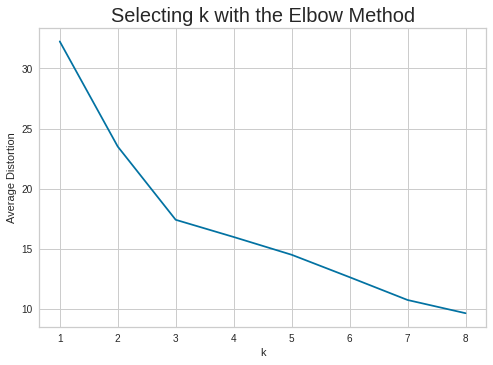

In [162]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_scaled_df)
    prediction=model.predict(cluster_scaled_df)
    distortion=sum(np.min(cdist(cluster_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / cluster_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [163]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((cluster_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(cluster_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7902398204696068)
For n_clusters = 3, silhouette score is 0.6592234502963282)
For n_clusters = 4, silhouette score is 0.6449039488548971)
For n_clusters = 5, silhouette score is 0.6111629133699795)
For n_clusters = 6, silhouette score is 0.44153090916607357)
For n_clusters = 7, silhouette score is 0.47027595743835227)
For n_clusters = 8, silhouette score is 0.4805197018541353)
For n_clusters = 9, silhouette score is 0.4659632140550741)


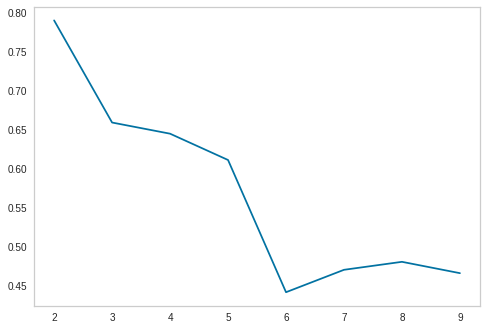

In [164]:
plt.plot(cluster_list,sil_score)
plt.grid()

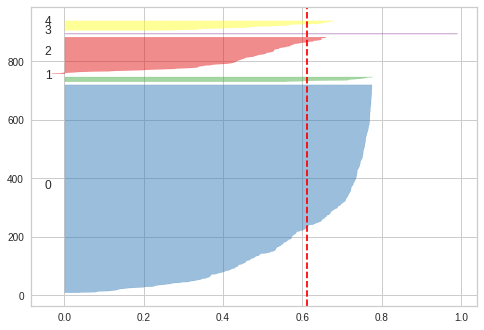

In [165]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 99))
visualizer.fit(cluster_scaled_df) ;   

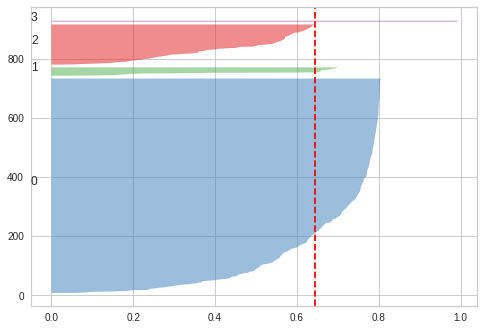

In [166]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state =99))
visualizer.fit(cluster_scaled_df) ; 

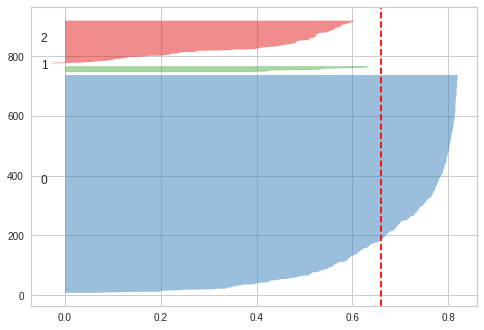

In [167]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 99))
visualizer.fit(cluster_scaled_df) ; 

In [168]:
kmeans = KMeans(n_clusters=3, random_state=99)
kmeans.fit(cluster_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [169]:
df['K_means_segments'] = kmeans.labels_

In [170]:
cluster_profile = df.groupby('K_means_segments').mean()

In [171]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['SURVIVED'].count().values

In [172]:
cluster_profile

,Age,Fare,SURVIVED,count_in_each_segment
K_means_segments,,,,
0,28.353478,15.453954,0.319616,729
1,31.166667,279.308545,0.700000,20
2,35.875372,83.393280,0.669014,142


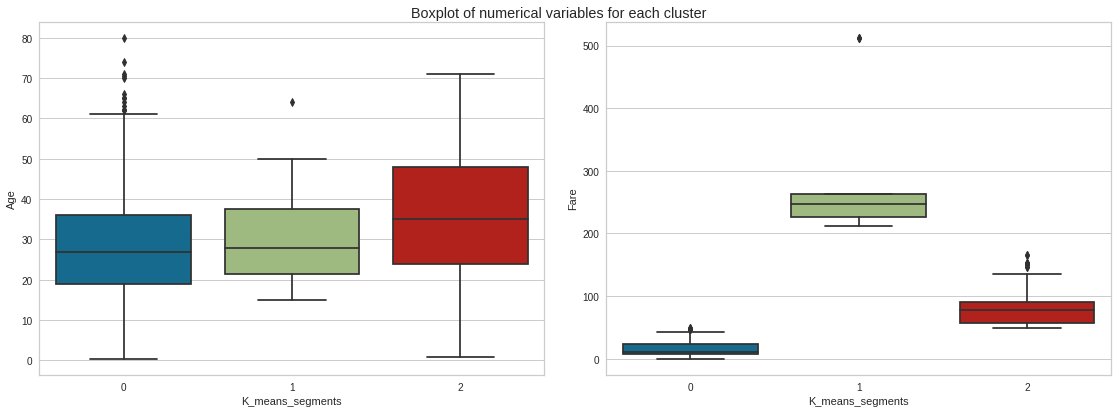

In [173]:
all_col = cluster_scaled_df.iloc[:,:].columns.tolist()

fig, axes = plt.subplots(1, 2,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(2):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

## Heirarchial Clustering

In [174]:
#import libraries needed for Hierarchial Clustering


from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering


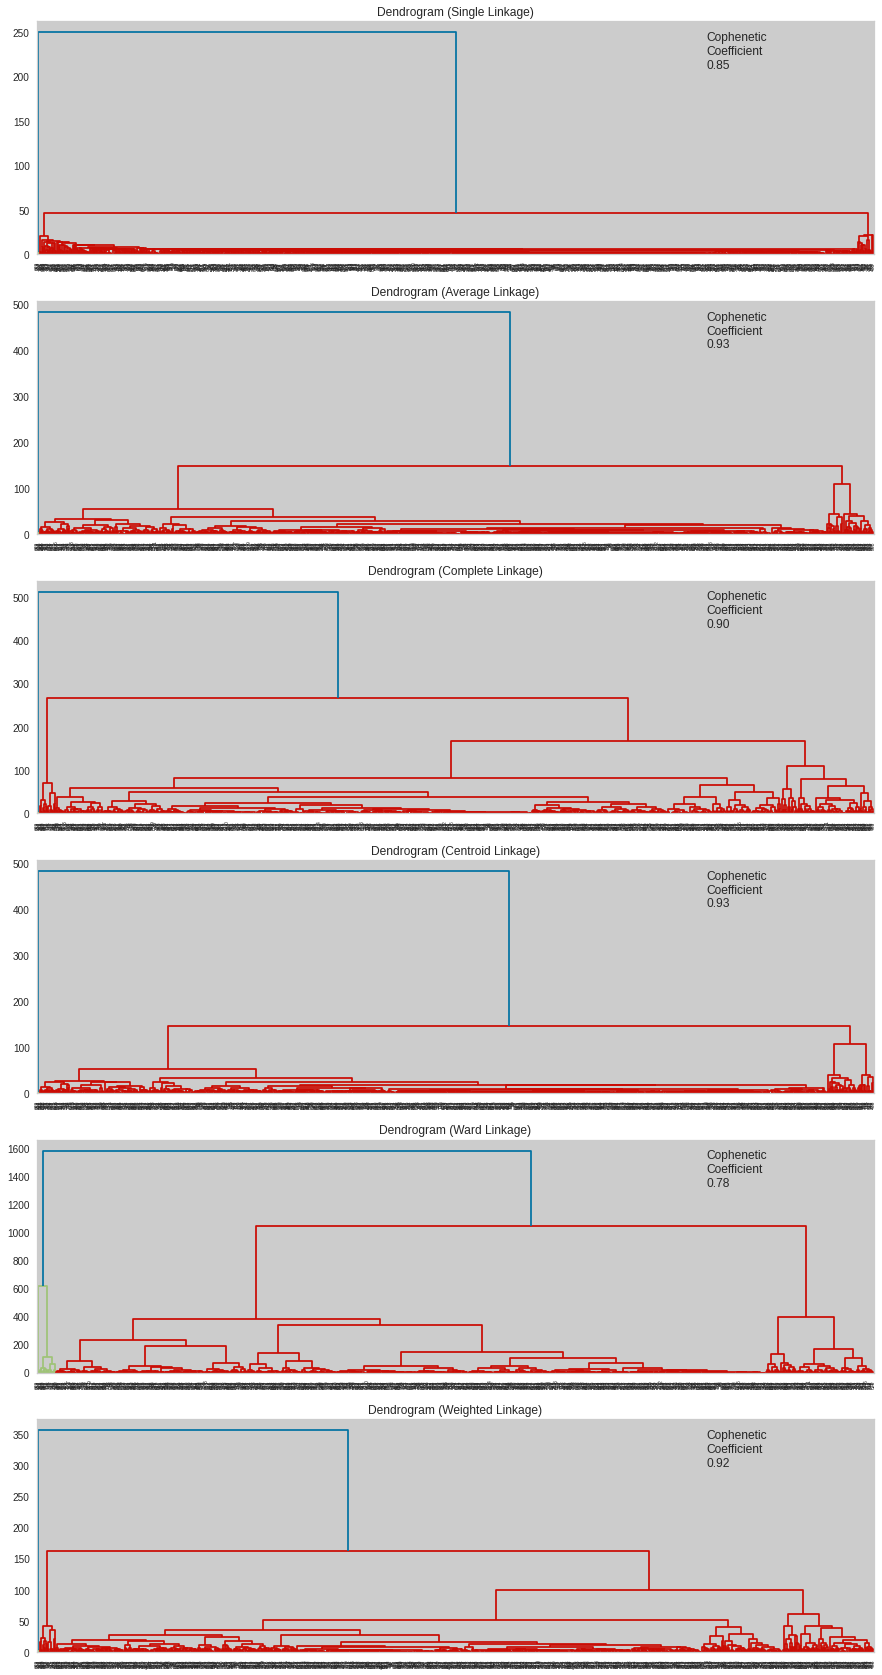

In [175]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(cluster_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(cluster_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

In [177]:
#Trying with K value as 6 and use the highest cophenetic score to determine linkage
HCmodel = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='average')
HCmodel.fit(cluster_scaled_df)
cluster_scaled_df['HC_Clusters'] = HCmodel.labels_

In [178]:
df['HC_Clusters'] = HCmodel.labels_

In [179]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [180]:
# visualize cluster profile
cluster_profile.style.highlight_max(color = 'yellow', axis = 0)

,Age,Fare,SURVIVED,K_means_segments
HC_Clusters,,,,
0,30.333333,238.187253,0.647059,1.000000
1,34.642857,129.789374,0.774194,2.000000
2,28.599732,14.762159,0.322082,0.000000
3,35.333333,512.329200,1.000000,1.000000
4,34.429907,65.238683,0.582677,1.716535
5,1.460000,151.550000,0.500000,2.000000


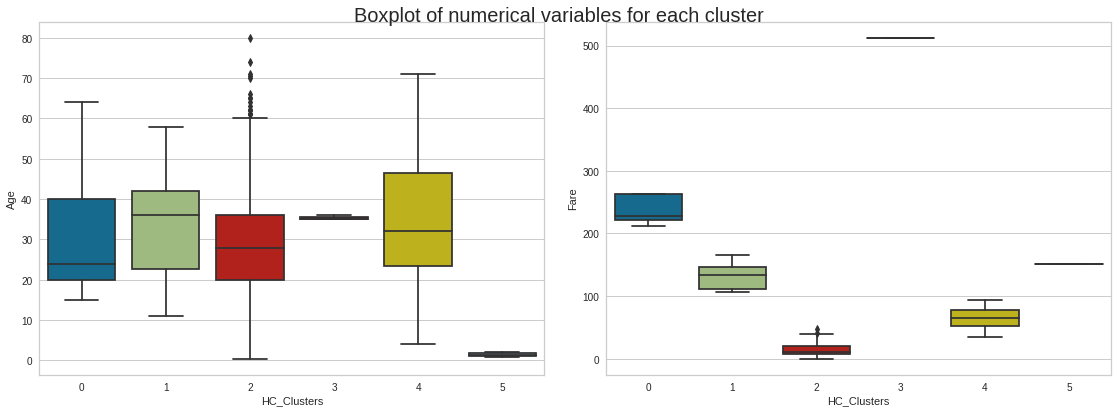

In [181]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(2):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)